In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.BRENT)

In [14]:
dataset.shape

(757, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
755,2025-06-24,CO,-432876.0,1189626.0,1622502.0,-6746.0,498013.0,504759.0,39743.0,-73318.0,...,-53127.0,-1301754.0,-766204.0,-726115.0,-9.31,0.94,-8.73,0.94,-8.32,0.85
756,2025-07-01,CO,-427357.0,1092550.0,1519907.0,-8225.0,475395.0,483620.0,5519.0,39743.0,...,-1301754.0,NaN,-726115.0,NaN,0.94,NaN,0.94,NaN,0.85,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       757.000000
mean    -406194.019815
std      202484.353988
min     -949089.000000
25%     -561322.000000
50%     -353317.000000
75%     -260809.000000
max      -16110.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       757.000000
mean      91411.809775
std      132752.740601
min     -294812.000000
25%        7527.000000
50%       75283.000000
75%      151150.000000
max      508872.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(178)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['Commercial_NetPosition_to_openinterest_change',
                         'CommercialLongPosition_to_openinterest_change',
                         'CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("br_cot_comm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'Commercial_NetPosition_change': ['prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_cumulative_5D_F1_Volume_change',
  'prior_report_Commercial_NetPosition_change',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_change': ['prior_report_CommercialLongPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'F2_RolledPrice_change',
  'prior_cumulative_5D_F1_Volume_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_change': ['prior_5D_F1_OI_change',
  'F3_RolledPrice_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'Commercial_NetPosition_to_openinterest_change': ['prior_report_CommercialLongPosition_change',
  'prior_report_CommercialShortPosition_change',
  'prior_5D_F2_OI_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_cumulative_5D_F1_Volume_change',
  'F2_RolledPrice_change'],
 'CommercialLongPosition_to_openinterest_change': ['prior

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 18:28:15,745] A new study created in memory with name: no-name-3ac9fe92-8b6f-44b7-8b72-3f8bcb63c623
Best trial: 1. Best value: 0.473249:   1%|       | 1/80 [00:01<01:43,  1.31s/it]

[I 2025-08-20 18:28:17,063] Trial 0 finished with value: 0.47324594134089737 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.47324594134089737.
[I 2025-08-20 18:28:17,094] Trial 1 finished with value: 0.47324853322583244 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.47324853322583244.


Best trial: 2. Best value: 0.583454:   4%|▎      | 3/80 [00:05<02:21,  1.84s/it]

[I 2025-08-20 18:28:21,121] Trial 2 finished with value: 0.583453840460165 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 2. Best value: 0.583454:  10%|▋      | 8/80 [00:05<00:32,  2.19it/s]

[I 2025-08-20 18:28:21,390] Trial 3 finished with value: 0.5485520368770624 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.583453840460165.
[I 2025-08-20 18:28:21,419] Trial 4 finished with value: 0.4732487012202681 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.583453840460165.
[I 2025-08-20 18:28:21,450] Trial 5 finished with value: 0.473248533068869 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.583453840460165.
[I 2025-08-20 18:28:21,479] Trial 6 finished with value: 0.45147626570583455 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.583453840460165.
[I 2025-08-20 18:28:21,508] Trial 7 finished with value: 0.473248533068869 and parameters

Best trial: 2. Best value: 0.583454:  12%|▊     | 10/80 [00:06<00:25,  2.77it/s]

[I 2025-08-20 18:28:21,799] Trial 8 finished with value: 0.563659600220392 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.583453840460165.
[I 2025-08-20 18:28:21,830] Trial 9 finished with value: 0.473248533068869 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 2. Best value: 0.583454:  12%|▊     | 10/80 [00:09<00:25,  2.77it/s]

[I 2025-08-20 18:28:25,239] Trial 10 finished with value: 0.5834524840305242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 2. Best value: 0.583454:  15%|▉     | 12/80 [00:13<01:32,  1.36s/it]

[I 2025-08-20 18:28:28,922] Trial 11 finished with value: 0.5834524840305242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 2. Best value: 0.583454:  16%|▉     | 13/80 [00:16<01:59,  1.79s/it]

[I 2025-08-20 18:28:32,600] Trial 12 finished with value: 0.5834524840305242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 2. Best value: 0.583454:  18%|█     | 14/80 [00:18<01:58,  1.80s/it]

[I 2025-08-20 18:28:34,432] Trial 13 finished with value: 0.562620414196967 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.583453840460165.


Best trial: 14. Best value: 0.584973:  19%|▉    | 15/80 [00:25<03:10,  2.93s/it]

[I 2025-08-20 18:28:41,179] Trial 14 finished with value: 0.5849727072424225 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5849727072424225.


Best trial: 14. Best value: 0.584973:  20%|█    | 16/80 [00:32<04:07,  3.86s/it]

[I 2025-08-20 18:28:47,886] Trial 15 finished with value: 0.5849693967503403 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5849727072424225.


Best trial: 16. Best value: 0.584973:  22%|█▏   | 18/80 [00:39<04:49,  4.67s/it]

[I 2025-08-20 18:28:54,864] Trial 16 finished with value: 0.5849733524014227 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.
[I 2025-08-20 18:28:54,911] Trial 17 finished with value: 0.4717535689524629 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5849733524014227.
[I 2025-08-20 18:28:54,944] Trial 18 finished with value: 0.47322791709670065 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  25%|█▎   | 20/80 [00:42<02:53,  2.88s/it]

[I 2025-08-20 18:28:58,709] Trial 19 finished with value: 0.5651982433279809 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  26%|█▎   | 21/80 [00:47<03:15,  3.31s/it]

[I 2025-08-20 18:29:03,720] Trial 20 finished with value: 0.5800566166011992 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  28%|█▍   | 22/80 [00:54<03:59,  4.13s/it]

[I 2025-08-20 18:29:10,705] Trial 21 finished with value: 0.5849693967503403 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  29%|█▍   | 23/80 [01:00<04:18,  4.54s/it]

[I 2025-08-20 18:29:16,528] Trial 22 finished with value: 0.584890784277713 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  30%|█▌   | 24/80 [01:02<03:27,  3.70s/it]

[I 2025-08-20 18:29:17,791] Trial 23 finished with value: 0.5838779221808389 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  31%|█▌   | 25/80 [01:07<03:54,  4.27s/it]

[I 2025-08-20 18:29:23,630] Trial 24 finished with value: 0.5845245948221113 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  32%|█▋   | 26/80 [01:15<04:38,  5.16s/it]

[I 2025-08-20 18:29:31,109] Trial 25 finished with value: 0.5809678459467339 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  34%|█▋   | 27/80 [01:23<05:17,  6.00s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 18:29:39,221] Trial 26 finished with value: 0.5661005505564543 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 18:29:39,676] Trial 27 finished with value: 0.4891064732125753 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.5849733524014227.
[I 2025-08-20 18:29:39,710] Trial 28 finished with value: 0.47354175697742595 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.5849733524014227.
[I 2025-08-20 18:29:39,741] Trial 29 finished with value: 0.47324853143369494 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 16. Best value: 0.584973:  39%|█▉   | 31/80 [01:27<02:07,  2.61s/it]

[I 2025-08-20 18:29:43,155] Trial 30 finished with value: 0.558680553740559 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.5849733524014227.


Best trial: 31. Best value: 0.584998:  40%|██   | 32/80 [01:34<02:48,  3.50s/it]

[I 2025-08-20 18:29:50,057] Trial 31 finished with value: 0.5849982181954507 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  41%|██   | 33/80 [01:41<03:20,  4.26s/it]

[I 2025-08-20 18:29:56,875] Trial 32 finished with value: 0.5844583766478572 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  42%|██▏  | 34/80 [01:46<03:34,  4.66s/it]

[I 2025-08-20 18:30:02,736] Trial 33 finished with value: 0.5845120706286289 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  44%|██▏  | 35/80 [01:50<03:12,  4.29s/it]

[I 2025-08-20 18:30:05,971] Trial 34 finished with value: 0.5632061517391563 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 11, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  46%|██▎  | 37/80 [01:57<03:36,  5.05s/it]

[I 2025-08-20 18:30:13,054] Trial 35 finished with value: 0.584975271869146 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:13,102] Trial 36 finished with value: 0.47282105066815655 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:13,146] Trial 37 finished with value: 0.4732485330660775 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  49%|██▍  | 39/80 [02:02<02:11,  3.21s/it]

[I 2025-08-20 18:30:17,960] Trial 38 finished with value: 0.5844896043050357 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  50%|██▌  | 40/80 [02:05<02:04,  3.12s/it]

[I 2025-08-20 18:30:20,727] Trial 39 finished with value: 0.565703662443433 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:20,769] Trial 40 finished with value: 0.473248533068869 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  52%|██▋  | 42/80 [02:11<02:02,  3.22s/it]

[I 2025-08-20 18:30:27,515] Trial 41 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  54%|██▋  | 43/80 [02:18<02:26,  3.96s/it]

[I 2025-08-20 18:30:34,268] Trial 42 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  55%|██▊  | 44/80 [02:25<02:47,  4.65s/it]

[I 2025-08-20 18:30:41,235] Trial 43 finished with value: 0.5845983625189908 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  56%|██▊  | 45/80 [02:31<02:52,  4.92s/it]

[I 2025-08-20 18:30:47,002] Trial 44 finished with value: 0.5848720749576124 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  61%|███  | 49/80 [02:38<01:20,  2.58s/it]

[I 2025-08-20 18:30:53,843] Trial 45 finished with value: 0.5845983625189908 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:53,886] Trial 46 finished with value: 0.47328568947096444 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:53,917] Trial 47 finished with value: 0.473248533068869 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:30:53,965] Trial 48 finished with value: 0.4717535696191204 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  62%|███▏ | 50/80 [02:43<01:32,  3.09s/it]

[I 2025-08-20 18:30:59,069] Trial 49 finished with value: 0.581874523981634 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  64%|███▏ | 51/80 [02:50<01:53,  3.92s/it]

[I 2025-08-20 18:31:05,876] Trial 50 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  65%|███▎ | 52/80 [02:57<02:09,  4.64s/it]

[I 2025-08-20 18:31:12,781] Trial 51 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  66%|███▎ | 53/80 [03:04<02:22,  5.30s/it]

[I 2025-08-20 18:31:19,981] Trial 52 finished with value: 0.5845983625189908 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  68%|███▍ | 54/80 [03:11<02:28,  5.71s/it]

[I 2025-08-20 18:31:26,838] Trial 53 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  69%|███▍ | 55/80 [03:12<01:53,  4.55s/it]

[I 2025-08-20 18:31:28,338] Trial 54 finished with value: 0.5834646713475653 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  70%|███▌ | 56/80 [03:18<01:57,  4.89s/it]

[I 2025-08-20 18:31:34,107] Trial 55 finished with value: 0.5848720749576125 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  71%|███▌ | 57/80 [03:19<01:27,  3.82s/it]

[I 2025-08-20 18:31:35,291] Trial 56 finished with value: 0.5546478050901129 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  72%|███▋ | 58/80 [03:20<01:07,  3.07s/it]

[I 2025-08-20 18:31:36,515] Trial 57 finished with value: 0.5650189822333259 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  74%|███▋ | 59/80 [03:27<01:29,  4.27s/it]

[I 2025-08-20 18:31:43,670] Trial 58 finished with value: 0.5822925731850079 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  75%|███▊ | 60/80 [03:33<01:34,  4.72s/it]

[I 2025-08-20 18:31:49,463] Trial 59 finished with value: 0.5834884593949333 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:31:49,509] Trial 60 finished with value: 0.47324852983787535 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  78%|███▉ | 62/80 [03:40<01:13,  4.09s/it]

[I 2025-08-20 18:31:56,152] Trial 61 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  79%|███▉ | 63/80 [03:47<01:20,  4.72s/it]

[I 2025-08-20 18:32:02,811] Trial 62 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  80%|████ | 64/80 [03:53<01:23,  5.24s/it]

[I 2025-08-20 18:32:09,526] Trial 63 finished with value: 0.5845983625189908 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  81%|████ | 65/80 [04:00<01:25,  5.68s/it]

[I 2025-08-20 18:32:16,390] Trial 64 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  84%|████▏| 67/80 [04:08<00:58,  4.48s/it]

[I 2025-08-20 18:32:23,915] Trial 65 finished with value: 0.5772374523780058 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:32:24,097] Trial 66 finished with value: 0.370298538682089 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  85%|████▎| 68/80 [04:15<01:01,  5.17s/it]

[I 2025-08-20 18:32:30,945] Trial 67 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:32:30,978] Trial 68 finished with value: 0.473248533068869 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  88%|████▍| 70/80 [04:22<00:44,  4.42s/it]

[I 2025-08-20 18:32:37,987] Trial 69 finished with value: 0.583605293864886 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  89%|████▍| 71/80 [04:24<00:35,  3.96s/it]

[I 2025-08-20 18:32:40,532] Trial 70 finished with value: 0.5216153128116034 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  90%|████▌| 72/80 [04:31<00:37,  4.67s/it]

[I 2025-08-20 18:32:47,245] Trial 71 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  91%|████▌| 73/80 [04:38<00:37,  5.30s/it]

[I 2025-08-20 18:32:54,231] Trial 72 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  92%|████▋| 74/80 [04:45<00:34,  5.73s/it]

[I 2025-08-20 18:33:01,095] Trial 73 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  94%|████▋| 75/80 [04:52<00:30,  6.09s/it]

[I 2025-08-20 18:33:08,096] Trial 74 finished with value: 0.5845983625189908 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:33:08,130] Trial 75 finished with value: 0.47324946476609453 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  96%|████▊| 77/80 [04:59<00:14,  4.90s/it]

[I 2025-08-20 18:33:14,959] Trial 76 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998:  98%|████▉| 78/80 [05:05<00:10,  5.35s/it]

[I 2025-08-20 18:33:21,719] Trial 77 finished with value: 0.5849750283804976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.5849982181954507.


Best trial: 31. Best value: 0.584998: 100%|█████| 80/80 [05:11<00:00,  3.90s/it]
[I 2025-08-20 18:33:27,507] A new study created in memory with name: no-name-7eb40750-9f45-48fc-bfae-662bf6067ece


[I 2025-08-20 18:33:27,456] Trial 78 finished with value: 0.584525219626617 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.5849982181954507.
[I 2025-08-20 18:33:27,499] Trial 79 finished with value: 0.4732485325481071 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 31 with value: 0.5849982181954507.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.4732, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.4728, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.5661, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5486, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.68423

Best trial: 0. Best value: 0.834829:   1%|       | 1/80 [00:00<00:05, 13.80it/s]

[I 2025-08-20 18:33:27,548] Trial 0 finished with value: 0.8348294400445464 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:27,579] Trial 1 finished with value: 0.8348259406811089 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.8348294400445464.


Best trial: 0. Best value: 0.834829:   4%|▎      | 3/80 [00:03<01:30,  1.18s/it]

[I 2025-08-20 18:33:31,038] Trial 2 finished with value: 0.8190844582852411 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8348294400445464.


Best trial: 0. Best value: 0.834829:  10%|▋      | 8/80 [00:03<00:23,  3.01it/s]

[I 2025-08-20 18:33:31,315] Trial 3 finished with value: 0.8179541806595286 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,347] Trial 4 finished with value: 0.8348262790156369 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,377] Trial 5 finished with value: 0.8348259403637253 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,406] Trial 6 finished with value: 0.8081426544549631 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,437] Trial 7 finished with value: 0.8348259403637253 and param

Best trial: 11. Best value: 0.83484:  16%|▉     | 13/80 [00:04<00:12,  5.34it/s]

[I 2025-08-20 18:33:31,788] Trial 8 finished with value: 0.8239852170483583 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,830] Trial 9 finished with value: 0.8348259403637253 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8348294400445464.
[I 2025-08-20 18:33:31,867] Trial 10 finished with value: 0.8348360140324955 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.8348360140324955.
[I 2025-08-20 18:33:31,911] Trial 11 finished with value: 0.8348403540464387 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.8348403540464387.
[I 2025-08-20 18:33:31,942] Trial 12 finished with value: 0.8348359244926018 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 with value

Best trial: 14. Best value: 0.834845:  22%|█▏   | 18/80 [00:10<00:37,  1.63it/s]

[I 2025-08-20 18:33:37,785] Trial 13 finished with value: 0.8284042116987663 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.8348403540464387.
[I 2025-08-20 18:33:37,830] Trial 14 finished with value: 0.834844888035412 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.834844888035412.
[I 2025-08-20 18:33:37,874] Trial 15 finished with value: 0.8348259405702398 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.834844888035412.
[I 2025-08-20 18:33:37,906] Trial 16 finished with value: 0.8348261442128072 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.834844888035412.
[I 2025-08-20 18:33:37,953] Trial 17 finished with value: 0.834593022706924 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, 'loss

Best trial: 14. Best value: 0.834845:  22%|█▏   | 18/80 [00:11<00:37,  1.63it/s]

[I 2025-08-20 18:33:39,141] Trial 18 finished with value: 0.8173993231358183 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.834844888035412.


Best trial: 21. Best value: 0.834855:  30%|█▌   | 24/80 [00:15<00:40,  1.37it/s]

[I 2025-08-20 18:33:43,016] Trial 19 finished with value: 0.8292698274097307 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.834844888035412.
[I 2025-08-20 18:33:43,061] Trial 20 finished with value: 0.8348271504611157 and parameters: {'model': 'lasso', 'alpha': 0.39800305410955994}. Best is trial 14 with value: 0.834844888035412.
[I 2025-08-20 18:33:43,104] Trial 21 finished with value: 0.8348553229907929 and parameters: {'model': 'lasso', 'alpha': 9.649997386652013}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,138] Trial 22 finished with value: 0.8348530610154818 and parameters: {'model': 'lasso', 'alpha': 8.963281458966168}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,180] Trial 23 finished with value: 0.8348544341469142 and parameters: {'model': 'lasso', 'alpha': 9.394275321513108}. Best is trial 21 with value: 0.8348553229

Best trial: 29. Best value: 0.834856:  36%|█▊   | 29/80 [00:15<00:17,  2.89it/s]

[I 2025-08-20 18:33:43,245] Trial 25 finished with value: 0.8348501248365581 and parameters: {'model': 'lasso', 'alpha': 8.002321030990597}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,279] Trial 26 finished with value: 0.8348259454218462 and parameters: {'model': 'lasso', 'alpha': 0.0016835848102390361}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,322] Trial 27 finished with value: 0.8132464264400031 and parameters: {'model': 'ridge', 'alpha': 926.5660759455584}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,369] Trial 28 finished with value: 0.8345732572467432 and parameters: {'model': 'enet', 'alpha': 0.04029478670713864, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 21 with value: 0.8348553229907929.
[I 2025-08-20 18:33:43,415] Trial 29 finished with value: 0.8348561217843049 and parameters: {'model': 'lasso', 'alpha': 9.911570866499451}. Best is trial 29 with value: 0.8348

Best trial: 29. Best value: 0.834856:  41%|██   | 33/80 [00:17<00:16,  2.82it/s]

[I 2025-08-20 18:33:44,457] Trial 30 finished with value: 0.7851809259266305 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:44,491] Trial 31 finished with value: 0.8348515231812869 and parameters: {'model': 'lasso', 'alpha': 8.459221951320771}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:44,524] Trial 32 finished with value: 0.8348282552240761 and parameters: {'model': 'lasso', 'alpha': 0.7699529486679321}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:44,566] Trial 33 finished with value: 0.834853103365571 and parameters: {'model': 'lasso', 'alpha': 8.977143944972818}. Best is trial 29 with value: 0.8348561217843049.


Best trial: 29. Best value: 0.834856:  44%|██▏  | 35/80 [00:20<00:25,  1.75it/s]

[I 2025-08-20 18:33:47,650] Trial 34 finished with value: 0.8226114363472824 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011447124531839908, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.9969377194558946, 'max_leaf_nodes': 232}. Best is trial 29 with value: 0.8348561217843049.


Best trial: 29. Best value: 0.834856:  46%|██▎  | 37/80 [00:22<00:30,  1.42it/s]

[I 2025-08-20 18:33:49,904] Trial 35 finished with value: 0.8162462303411194 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:49,939] Trial 36 finished with value: 0.8331164339824771 and parameters: {'model': 'ridge', 'alpha': 79.86362724254148}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:49,983] Trial 37 finished with value: 0.8348290295612778 and parameters: {'model': 'lasso', 'alpha': 1.024282626602415}. Best is trial 29 with value: 0.8348561217843049.


Best trial: 29. Best value: 0.834856:  49%|██▍  | 39/80 [00:26<00:44,  1.09s/it]

[I 2025-08-20 18:33:54,483] Trial 38 finished with value: 0.8234178366674747 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 29 with value: 0.8348561217843049.


Best trial: 42. Best value: 0.834856:  55%|██▊  | 44/80 [00:28<00:22,  1.58it/s]

[I 2025-08-20 18:33:55,930] Trial 39 finished with value: 0.8245056118859799 and parameters: {'model': 'hgbm', 'learning_rate': 0.002361099452244772, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.06578691118733848, 'max_leaf_nodes': 25}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:55,961] Trial 40 finished with value: 0.8348259403637253 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:55,993] Trial 41 finished with value: 0.8348318829242706 and parameters: {'model': 'lasso', 'alpha': 1.9756175619363439}. Best is trial 29 with value: 0.8348561217843049.
[I 2025-08-20 18:33:56,027] Trial 42 finished with value: 0.8348561233450208 and parameters: {'model': 'lasso', 'alpha': 9.912081962138659}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,061] Trial 43 finished with value: 0.8348269170073012 and parameters: {'model': 'lasso', 'alpha': 0.3249504255864693}. Best is trial 42 wi

Best trial: 42. Best value: 0.834856:  60%|███  | 48/80 [00:28<00:13,  2.29it/s]

[I 2025-08-20 18:33:56,150] Trial 45 finished with value: 0.8348523893558565 and parameters: {'model': 'lasso', 'alpha': 8.743439649480319}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,194] Trial 46 finished with value: 0.8333385583078367 and parameters: {'model': 'ridge', 'alpha': 73.68257037626124}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,227] Trial 47 finished with value: 0.8348259403637253 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,270] Trial 48 finished with value: 0.8348291170065019 and parameters: {'model': 'lasso', 'alpha': 1.0501036146929854}. Best is trial 42 with value: 0.8348561233450208.


Best trial: 42. Best value: 0.834856:  68%|███▍ | 54/80 [00:29<00:06,  4.19it/s]

[I 2025-08-20 18:33:56,515] Trial 49 finished with value: 0.816468370384224 and parameters: {'model': 'enet', 'alpha': 0.06585073843573762, 'l1_ratio': 0.9438658020309548, 'loss': 'huber', 'epsilon': 0.19973882509898996}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,560] Trial 50 finished with value: 0.8348259427687474 and parameters: {'model': 'lasso', 'alpha': 0.0007980844014703016}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,592] Trial 51 finished with value: 0.8348339508913655 and parameters: {'model': 'lasso', 'alpha': 2.6636051549728657}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,624] Trial 52 finished with value: 0.8348485624968252 and parameters: {'model': 'lasso', 'alpha': 7.499663451090193}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:56,659] Trial 53 finished with value: 0.8348350559206741 and parameters: {'model': 'lasso', 'alpha': 3.0200799556135913}. Best is tria

Best trial: 42. Best value: 0.834856:  70%|███▌ | 56/80 [00:31<00:09,  2.52it/s]

[I 2025-08-20 18:33:58,873] Trial 55 finished with value: 0.8084885945746713 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:33:58,918] Trial 56 finished with value: 0.8348275786609634 and parameters: {'model': 'lasso', 'alpha': 0.5436895025780796}. Best is trial 42 with value: 0.8348561233450208.


Best trial: 42. Best value: 0.834856:  74%|███▋ | 59/80 [00:32<00:09,  2.30it/s]

[I 2025-08-20 18:33:59,997] Trial 57 finished with value: 0.7931682535985872 and parameters: {'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:00,034] Trial 58 finished with value: 0.8348338349983517 and parameters: {'model': 'lasso', 'alpha': 2.6304638573536314}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:00,067] Trial 59 finished with value: 0.8348263842984956 and parameters: {'model': 'lasso', 'alpha': 0.14628527111909048}. Best is trial 42 with value: 0.8348561233450208.


Best trial: 42. Best value: 0.834856:  80%|████ | 64/80 [00:38<00:10,  1.47it/s]

[I 2025-08-20 18:34:06,320] Trial 60 finished with value: 0.8238873690256986 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,365] Trial 61 finished with value: 0.8348533421317706 and parameters: {'model': 'lasso', 'alpha': 9.055301278392104}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,398] Trial 62 finished with value: 0.8348391191077084 and parameters: {'model': 'lasso', 'alpha': 4.382346820980518}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,442] Trial 63 finished with value: 0.8348383424287784 and parameters: {'model': 'lasso', 'alpha': 4.1030342898535475}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,479] Trial 64 finished with value: 0.8348543767710244 and parameters: {'model': 'lasso', 'alpha': 9.375490592256066}. Best is trial 42 with value: 0.834856123345

Best trial: 42. Best value: 0.834856:  88%|████▍| 70/80 [00:39<00:03,  2.90it/s]

[I 2025-08-20 18:34:06,528] Trial 65 finished with value: 0.834589131718271 and parameters: {'model': 'enet', 'alpha': 0.07886068806785375, 'l1_ratio': 0.5262173782558857, 'loss': 'squared_error'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,562] Trial 66 finished with value: 0.8348303602244586 and parameters: {'model': 'lasso', 'alpha': 1.468738369271248}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,604] Trial 67 finished with value: 0.8348390676981867 and parameters: {'model': 'lasso', 'alpha': 4.365582504930828}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,635] Trial 68 finished with value: 0.8348259403637253 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:06,678] Trial 69 finished with value: 0.8348259403778648 and parameters: {'model': 'lasso', 'alpha': 4.693855750735629e-06}. Best is trial 42 with value: 0.8348561233450208.


Best trial: 42. Best value: 0.834856:  94%|████▋| 75/80 [00:40<00:01,  3.48it/s]

[I 2025-08-20 18:34:07,872] Trial 70 finished with value: 0.8150920957441586 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:07,906] Trial 71 finished with value: 0.8348556722574061 and parameters: {'model': 'lasso', 'alpha': 9.764364294480421}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:07,950] Trial 72 finished with value: 0.8348408007921619 and parameters: {'model': 'lasso', 'alpha': 4.917813409496693}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:07,992] Trial 73 finished with value: 0.8348322791945869 and parameters: {'model': 'lasso', 'alpha': 2.1091674247893137}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:08,035] Trial 74 finished with value: 0.834854912336279 and parameters: {'model': 'lasso', 'alpha': 9.515537548851754}. Best is trial 42 with value: 0.83485612334

Best trial: 42. Best value: 0.834856:  98%|████▉| 78/80 [00:40<00:00,  4.83it/s]

[I 2025-08-20 18:34:08,101] Trial 76 finished with value: 0.8344660184878171 and parameters: {'model': 'ridge', 'alpha': 36.1864605016625}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:08,146] Trial 77 finished with value: 0.8348388762181492 and parameters: {'model': 'lasso', 'alpha': 4.296650152790636}. Best is trial 42 with value: 0.8348561233450208.


Best trial: 42. Best value: 0.834856: 100%|█████| 80/80 [00:42<00:00,  1.87it/s]
[I 2025-08-20 18:34:10,284] A new study created in memory with name: no-name-87382313-8cd5-4ef6-b440-53dc5c28b777


[I 2025-08-20 18:34:10,233] Trial 78 finished with value: 0.8226041770068737 and parameters: {'model': 'hgbm', 'learning_rate': 0.007147390775075425, 'max_depth': 11, 'max_iter': 600, 'l2_regularization': 0.985276956301785, 'max_leaf_nodes': 190}. Best is trial 42 with value: 0.8348561233450208.
[I 2025-08-20 18:34:10,277] Trial 79 finished with value: 0.8348259865435302 and parameters: {'model': 'lasso', 'alpha': 0.015351249999486942}. Best is trial 42 with value: 0.8348561233450208.
Overall Best Params: {'model': 'lasso', 'alpha': 9.912081962138659}

Best Per Model:
lasso: score=0.8348, params={'model': 'lasso', 'alpha': 4.693855750735629e-06}
ridge: score=0.8132, params={'model': 'ridge', 'alpha': 926.5660759455584}
rf: score=0.7852, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.7932, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.5966485

Best trial: 0. Best value: 0.867023:   1%|       | 1/80 [00:00<00:05, 14.06it/s]

[I 2025-08-20 18:34:10,325] Trial 0 finished with value: 0.8670226157090624 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:10,355] Trial 1 finished with value: 0.867021744265299 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.8670226157090624.


Best trial: 0. Best value: 0.867023:   4%|▎      | 3/80 [00:03<01:31,  1.19s/it]

[I 2025-08-20 18:34:13,847] Trial 2 finished with value: 0.8551308182042616 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8670226157090624.


Best trial: 0. Best value: 0.867023:   9%|▌      | 7/80 [00:03<00:28,  2.55it/s]

[I 2025-08-20 18:34:14,099] Trial 3 finished with value: 0.843782239200912 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,130] Trial 4 finished with value: 0.8670218067319876 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,163] Trial 5 finished with value: 0.8670217442064438 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,203] Trial 6 finished with value: 0.8475360278207611 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,232] Trial 7 finished with value: 0.8670217442064438 and parame

Best trial: 11. Best value: 0.867025:  15%|▊    | 12/80 [00:04<00:13,  5.14it/s]

[I 2025-08-20 18:34:14,549] Trial 8 finished with value: 0.8527811142753584 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,588] Trial 9 finished with value: 0.8670217442064438 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8670226157090624.
[I 2025-08-20 18:34:14,631] Trial 10 finished with value: 0.8670242529644874 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.8670242529644874.
[I 2025-08-20 18:34:14,664] Trial 11 finished with value: 0.8670253507508414 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.8670253507508414.
[I 2025-08-20 18:34:14,698] Trial 12 finished with value: 0.8670242309946269 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 with value

Best trial: 14. Best value: 0.867026:  21%|█    | 17/80 [00:10<00:40,  1.56it/s]

[I 2025-08-20 18:34:20,697] Trial 13 finished with value: 0.8570372787059469 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.8670253507508414.
[I 2025-08-20 18:34:20,742] Trial 14 finished with value: 0.8670264739757686 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.8670264739757686.
[I 2025-08-20 18:34:20,775] Trial 15 finished with value: 0.8670217442579782 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.8670264739757686.
[I 2025-08-20 18:34:20,808] Trial 16 finished with value: 0.8670217950415312 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.8670264739757686.
[I 2025-08-20 18:34:20,858] Trial 17 finished with value: 0.8669953461406108 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, 

Best trial: 14. Best value: 0.867026:  24%|█▏   | 19/80 [00:11<00:38,  1.57it/s]

[I 2025-08-20 18:34:22,068] Trial 18 finished with value: 0.8532223645607881 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8670264739757686.


Best trial: 21. Best value: 0.867029:  30%|█▌   | 24/80 [00:15<00:36,  1.54it/s]

[I 2025-08-20 18:34:26,000] Trial 19 finished with value: 0.8611861201136635 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.8670264739757686.
[I 2025-08-20 18:34:26,043] Trial 20 finished with value: 0.8670220438409484 and parameters: {'model': 'lasso', 'alpha': 0.39800305410955994}. Best is trial 14 with value: 0.8670264739757686.
[I 2025-08-20 18:34:26,087] Trial 21 finished with value: 0.8670289917418406 and parameters: {'model': 'lasso', 'alpha': 9.649997386652013}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,121] Trial 22 finished with value: 0.8670284855480951 and parameters: {'model': 'lasso', 'alpha': 8.963281458966168}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,163] Trial 23 finished with value: 0.8670288063815278 and parameters: {'model': 'lasso', 'alpha': 9.394275321513108}. Best is trial 21 with value: 0.86702899

Best trial: 21. Best value: 0.867029:  35%|█▊   | 28/80 [00:16<00:22,  2.28it/s]

[I 2025-08-20 18:34:26,208] Trial 24 finished with value: 0.8670219538568268 and parameters: {'model': 'lasso', 'alpha': 0.27795930975857397}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,240] Trial 25 finished with value: 0.8670277584927545 and parameters: {'model': 'lasso', 'alpha': 8.002321030990597}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,281] Trial 26 finished with value: 0.8670217454782647 and parameters: {'model': 'lasso', 'alpha': 0.0016835848102390361}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,323] Trial 27 finished with value: 0.8484545022608897 and parameters: {'model': 'ridge', 'alpha': 926.5660759455584}. Best is trial 21 with value: 0.8670289917418406.
[I 2025-08-20 18:34:26,370] Trial 28 finished with value: 0.8668524705535684 and parameters: {'model': 'enet', 'alpha': 0.04029478670713864, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 21 with value: 0.86

Best trial: 29. Best value: 0.867029:  38%|█▉   | 30/80 [00:16<00:15,  3.25it/s]

[I 2025-08-20 18:34:26,415] Trial 29 finished with value: 0.867029187181326 and parameters: {'model': 'lasso', 'alpha': 9.911570866499451}. Best is trial 29 with value: 0.867029187181326.


Best trial: 29. Best value: 0.867029:  41%|██   | 33/80 [00:17<00:17,  2.73it/s]

[I 2025-08-20 18:34:27,482] Trial 30 finished with value: 0.8360122362588643 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:27,525] Trial 31 finished with value: 0.8670280987111788 and parameters: {'model': 'lasso', 'alpha': 8.459221951320771}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:27,568] Trial 32 finished with value: 0.8670223255505922 and parameters: {'model': 'lasso', 'alpha': 0.7699529486679321}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:27,602] Trial 33 finished with value: 0.8670284958527119 and parameters: {'model': 'lasso', 'alpha': 8.977143944972818}. Best is trial 29 with value: 0.867029187181326.


Best trial: 29. Best value: 0.867029:  44%|██▏  | 35/80 [00:20<00:26,  1.71it/s]

[I 2025-08-20 18:34:30,549] Trial 34 finished with value: 0.8543516247506605 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011447124531839908, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.9969377194558946, 'max_leaf_nodes': 232}. Best is trial 29 with value: 0.867029187181326.


Best trial: 29. Best value: 0.867029:  46%|██▎  | 37/80 [00:22<00:30,  1.42it/s]

[I 2025-08-20 18:34:32,832] Trial 35 finished with value: 0.8488602053707973 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:32,942] Trial 36 finished with value: 0.8660770959902417 and parameters: {'model': 'ridge', 'alpha': 79.86362724254148}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:32,977] Trial 37 finished with value: 0.8670225148844276 and parameters: {'model': 'lasso', 'alpha': 1.024282626602415}. Best is trial 29 with value: 0.867029187181326.


Best trial: 29. Best value: 0.867029:  49%|██▍  | 39/80 [00:27<00:48,  1.19s/it]

[I 2025-08-20 18:34:37,383] Trial 38 finished with value: 0.8534719961952338 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 29 with value: 0.867029187181326.


Best trial: 42. Best value: 0.867029:  54%|██▋  | 43/80 [00:28<00:25,  1.44it/s]

[I 2025-08-20 18:34:38,726] Trial 39 finished with value: 0.8562285509369777 and parameters: {'model': 'hgbm', 'learning_rate': 0.002361099452244772, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.06578691118733848, 'max_leaf_nodes': 25}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:38,757] Trial 40 finished with value: 0.8670217442064438 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:38,790] Trial 41 finished with value: 0.8670232309689981 and parameters: {'model': 'lasso', 'alpha': 1.9756175619363439}. Best is trial 29 with value: 0.867029187181326.
[I 2025-08-20 18:34:38,843] Trial 42 finished with value: 0.867029187564857 and parameters: {'model': 'lasso', 'alpha': 9.912081962138659}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:38,884] Trial 43 finished with value: 0.8670219891759677 and parameters: {'model': 'lasso', 'alpha': 0.3249504255864693}. Best is trial 42 with va

Best trial: 42. Best value: 0.867029:  60%|███  | 48/80 [00:28<00:14,  2.27it/s]

[I 2025-08-20 18:34:38,934] Trial 44 finished with value: 0.8670229679179978 and parameters: {'model': 'lasso', 'alpha': 1.6223005556767571}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:38,969] Trial 45 finished with value: 0.8670283063650219 and parameters: {'model': 'lasso', 'alpha': 8.743439649480319}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,000] Trial 46 finished with value: 0.8662026512625797 and parameters: {'model': 'ridge', 'alpha': 73.68257037626124}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,032] Trial 47 finished with value: 0.8670217442064438 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,064] Trial 48 finished with value: 0.8670225332349694 and parameters: {'model': 'lasso', 'alpha': 1.0501036146929854}. Best is trial 42 with value: 0.867029187564857.


Best trial: 42. Best value: 0.867029:  68%|███▍ | 54/80 [00:29<00:04,  5.24it/s]

[I 2025-08-20 18:34:39,289] Trial 49 finished with value: 0.8518660050942831 and parameters: {'model': 'enet', 'alpha': 0.06585073843573762, 'l1_ratio': 0.9438658020309548, 'loss': 'huber', 'epsilon': 0.19973882509898996}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,319] Trial 50 finished with value: 0.8670217448072818 and parameters: {'model': 'lasso', 'alpha': 0.0007980844014703016}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,350] Trial 51 finished with value: 0.8670237474741094 and parameters: {'model': 'lasso', 'alpha': 2.6636051549728657}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,382] Trial 52 finished with value: 0.867027375797979 and parameters: {'model': 'lasso', 'alpha': 7.499663451090193}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:39,416] Trial 53 finished with value: 0.8670240131931337 and parameters: {'model': 'lasso', 'alpha': 3.0200799556135913}. Best is trial 42

Best trial: 42. Best value: 0.867029:  70%|███▌ | 56/80 [00:31<00:09,  2.54it/s]

[I 2025-08-20 18:34:41,704] Trial 55 finished with value: 0.8410333078836071 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:41,736] Trial 56 finished with value: 0.867022154557936 and parameters: {'model': 'lasso', 'alpha': 0.5436895025780796}. Best is trial 42 with value: 0.867029187564857.


Best trial: 42. Best value: 0.867029:  74%|███▋ | 59/80 [00:32<00:08,  2.38it/s]

[I 2025-08-20 18:34:42,719] Trial 57 finished with value: 0.8223897093093788 and parameters: {'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:42,750] Trial 58 finished with value: 0.867023722488314 and parameters: {'model': 'lasso', 'alpha': 2.6304638573536314}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:42,794] Trial 59 finished with value: 0.8670218544696482 and parameters: {'model': 'lasso', 'alpha': 0.14628527111909048}. Best is trial 42 with value: 0.867029187564857.


Best trial: 42. Best value: 0.867029:  80%|████ | 64/80 [00:38<00:11,  1.34it/s]

[I 2025-08-20 18:34:48,899] Trial 60 finished with value: 0.8559116454429821 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:48,961] Trial 61 finished with value: 0.8670285539446598 and parameters: {'model': 'lasso', 'alpha': 9.055301278392104}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,019] Trial 62 finished with value: 0.8670250649404847 and parameters: {'model': 'lasso', 'alpha': 4.382346820980518}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,062] Trial 63 finished with value: 0.8670248553532994 and parameters: {'model': 'lasso', 'alpha': 4.1030342898535475}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,093] Trial 64 finished with value: 0.8670287924636213 and parameters: {'model': 'lasso', 'alpha': 9.375490592256066}. Best is trial 42 with value: 0.867029187564857.

Best trial: 42. Best value: 0.867029:  86%|████▎| 69/80 [00:39<00:03,  2.82it/s]

[I 2025-08-20 18:34:49,142] Trial 65 finished with value: 0.8668619283828913 and parameters: {'model': 'enet', 'alpha': 0.07886068806785375, 'l1_ratio': 0.5262173782558857, 'loss': 'squared_error'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,175] Trial 66 finished with value: 0.8670228543231198 and parameters: {'model': 'lasso', 'alpha': 1.468738369271248}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,219] Trial 67 finished with value: 0.8670250523498539 and parameters: {'model': 'lasso', 'alpha': 4.365582504930828}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,260] Trial 68 finished with value: 0.8670217442064438 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:49,294] Trial 69 finished with value: 0.8670217442099886 and parameters: {'model': 'lasso', 'alpha': 4.693855750735629e-06}. Best is trial 42 with value: 0.867029187564857.


Best trial: 42. Best value: 0.867029:  94%|████▋| 75/80 [00:40<00:01,  3.83it/s]

[I 2025-08-20 18:34:50,479] Trial 70 finished with value: 0.8491572019324382 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:50,512] Trial 71 finished with value: 0.8670290776030016 and parameters: {'model': 'lasso', 'alpha': 9.764364294480421}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:50,542] Trial 72 finished with value: 0.8670254570732454 and parameters: {'model': 'lasso', 'alpha': 4.917813409496693}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:50,576] Trial 73 finished with value: 0.8670233317877709 and parameters: {'model': 'lasso', 'alpha': 2.1091674247893137}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:50,619] Trial 74 finished with value: 0.8670288907681601 and parameters: {'model': 'lasso', 'alpha': 9.515537548851754}. Best is trial 42 with value: 0.86702918756485

Best trial: 42. Best value: 0.867029:  98%|████▉| 78/80 [00:40<00:00,  5.18it/s]

[I 2025-08-20 18:34:50,684] Trial 76 finished with value: 0.8668106196830832 and parameters: {'model': 'ridge', 'alpha': 36.1864605016625}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:50,726] Trial 77 finished with value: 0.867025000574183 and parameters: {'model': 'lasso', 'alpha': 4.296650152790636}. Best is trial 42 with value: 0.867029187564857.


Best trial: 42. Best value: 0.867029: 100%|█████| 80/80 [00:42<00:00,  1.89it/s]
[I 2025-08-20 18:34:52,716] A new study created in memory with name: no-name-ca86504b-5a46-4930-a6e7-07da6d26d7d5


[I 2025-08-20 18:34:52,666] Trial 78 finished with value: 0.8509301716643706 and parameters: {'model': 'hgbm', 'learning_rate': 0.007147390775075425, 'max_depth': 11, 'max_iter': 600, 'l2_regularization': 0.985276956301785, 'max_leaf_nodes': 190}. Best is trial 42 with value: 0.867029187564857.
[I 2025-08-20 18:34:52,711] Trial 79 finished with value: 0.867021755813898 and parameters: {'model': 'lasso', 'alpha': 0.015351249999486942}. Best is trial 42 with value: 0.867029187564857.
Overall Best Params: {'model': 'lasso', 'alpha': 9.912081962138659}

Best Per Model:
lasso: score=0.8670, params={'model': 'lasso', 'alpha': 4.693855750735629e-06}
ridge: score=0.8485, params={'model': 'ridge', 'alpha': 926.5660759455584}
rf: score=0.8360, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.8224, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.5966485956

Best trial: 1. Best value: 0.490614:   1%|       | 1/80 [00:00<00:04, 16.47it/s]

[I 2025-08-20 18:34:52,744] Trial 0 finished with value: -0.06988961771324619 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06988961771324619.
[I 2025-08-20 18:34:52,777] Trial 1 finished with value: 0.49061424840980133 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.49061424840980133.


Best trial: 2. Best value: 0.544622:   4%|▎      | 3/80 [00:03<01:32,  1.20s/it]

[I 2025-08-20 18:34:56,317] Trial 2 finished with value: 0.5446215508760837 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5446215508760837.


Best trial: 2. Best value: 0.544622:  10%|▋      | 8/80 [00:04<00:24,  2.95it/s]

[I 2025-08-20 18:34:56,601] Trial 3 finished with value: 0.5388595222218313 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5446215508760837.
[I 2025-08-20 18:34:56,630] Trial 4 finished with value: 0.490613313532485 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5446215508760837.
[I 2025-08-20 18:34:56,662] Trial 5 finished with value: 0.49061424928136776 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5446215508760837.
[I 2025-08-20 18:34:56,694] Trial 6 finished with value: 0.2767130573867857 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5446215508760837.
[I 2025-08-20 18:34:56,726] Trial 7 finished with value: 0.49061424928136776 and para

Best trial: 2. Best value: 0.544622:  12%|▊     | 10/80 [00:04<00:20,  3.50it/s]

[I 2025-08-20 18:34:57,040] Trial 8 finished with value: 0.5444167420179311 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5446215508760837.
[I 2025-08-20 18:34:57,072] Trial 9 finished with value: 0.49061424928136776 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5446215508760837.


Best trial: 10. Best value: 0.544629:  12%|▋    | 10/80 [00:07<00:20,  3.50it/s]

[I 2025-08-20 18:35:00,572] Trial 10 finished with value: 0.5446287480469343 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5446287480469343.


Best trial: 10. Best value: 0.544629:  15%|▊    | 12/80 [00:11<01:28,  1.29s/it]

[I 2025-08-20 18:35:04,124] Trial 11 finished with value: 0.5446287480469343 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5446287480469343.


Best trial: 10. Best value: 0.544629:  16%|▊    | 13/80 [00:14<01:54,  1.71s/it]

[I 2025-08-20 18:35:07,689] Trial 12 finished with value: 0.5446287480469342 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5446287480469343.


Best trial: 10. Best value: 0.544629:  18%|▉    | 14/80 [00:16<01:53,  1.72s/it]

[I 2025-08-20 18:35:09,444] Trial 13 finished with value: 0.5135613596264759 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.5446287480469343.


Best trial: 10. Best value: 0.544629:  19%|▉    | 15/80 [00:23<03:07,  2.88s/it]

[I 2025-08-20 18:35:16,282] Trial 14 finished with value: 0.5429891847959973 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.5446287480469343.


Best trial: 15. Best value: 0.546325:  20%|█    | 16/80 [00:25<02:44,  2.57s/it]

[I 2025-08-20 18:35:17,895] Trial 15 finished with value: 0.5463247319261042 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.5463247319261042.


Best trial: 16. Best value: 0.550773:  22%|█▏   | 18/80 [00:26<02:20,  2.27s/it]

[I 2025-08-20 18:35:19,312] Trial 16 finished with value: 0.5507727681663174 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:35:19,358] Trial 17 finished with value: 0.48569277622356666 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:35:19,400] Trial 18 finished with value: -0.06988961771324619 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  25%|█▎   | 20/80 [00:27<01:16,  1.27s/it]

[I 2025-08-20 18:35:20,419] Trial 19 finished with value: 0.5243422385441732 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  26%|█▎   | 21/80 [00:29<01:18,  1.34s/it]

[I 2025-08-20 18:35:22,027] Trial 20 finished with value: 0.5465463301453575 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  28%|█▍   | 22/80 [00:30<01:21,  1.41s/it]

[I 2025-08-20 18:35:23,690] Trial 21 finished with value: 0.5463765218328428 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  29%|█▍   | 23/80 [00:32<01:20,  1.42s/it]

[I 2025-08-20 18:35:25,128] Trial 22 finished with value: 0.5503576660951123 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  30%|█▌   | 24/80 [00:33<01:19,  1.42s/it]

[I 2025-08-20 18:35:26,541] Trial 23 finished with value: 0.5488379926022365 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  31%|█▌   | 25/80 [00:36<01:35,  1.74s/it]

[I 2025-08-20 18:35:29,183] Trial 24 finished with value: 0.5487897044761777 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  32%|█▋   | 26/80 [00:42<02:45,  3.06s/it]

[I 2025-08-20 18:35:35,670] Trial 25 finished with value: 0.5488619997856148 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  38%|█▉   | 30/80 [00:49<01:31,  1.84s/it]

[I 2025-08-20 18:35:42,123] Trial 26 finished with value: 0.5488619997856148 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:35:42,168] Trial 27 finished with value: 0.48564622007176417 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:35:42,201] Trial 28 finished with value: 0.4796344013464641 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:35:42,245] Trial 29 finished with value: 0.46310733096175 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  39%|█▉   | 31/80 [00:52<01:42,  2.09s/it]

[I 2025-08-20 18:35:45,286] Trial 30 finished with value: 0.5161091434685812 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  40%|██   | 32/80 [00:57<02:11,  2.74s/it]

[I 2025-08-20 18:35:50,233] Trial 31 finished with value: 0.5250324344070526 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  41%|██   | 33/80 [01:03<02:49,  3.60s/it]

[I 2025-08-20 18:35:56,476] Trial 32 finished with value: 0.5483674715787059 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  42%|██▏  | 34/80 [01:11<03:36,  4.70s/it]

[I 2025-08-20 18:36:04,293] Trial 33 finished with value: 0.5491808367939802 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  44%|██▏  | 35/80 [01:15<03:23,  4.52s/it]

[I 2025-08-20 18:36:08,344] Trial 34 finished with value: 0.5423139570544342 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  46%|██▎  | 37/80 [01:24<04:05,  5.72s/it]

[I 2025-08-20 18:36:17,156] Trial 35 finished with value: 0.5489309854542797 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:36:17,206] Trial 36 finished with value: 0.4759549621572214 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:36:17,254] Trial 37 finished with value: 0.49059275444688766 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  49%|██▍  | 39/80 [01:32<02:48,  4.10s/it]

[I 2025-08-20 18:36:25,387] Trial 38 finished with value: 0.5489309854542798 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  50%|██▌  | 40/80 [01:35<02:35,  3.90s/it]

[I 2025-08-20 18:36:28,506] Trial 39 finished with value: 0.5336592393335367 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:36:28,538] Trial 40 finished with value: 0.49061424928136776 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  52%|██▋  | 42/80 [01:43<02:30,  3.96s/it]

[I 2025-08-20 18:36:36,644] Trial 41 finished with value: 0.5489309854542797 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  54%|██▋  | 43/80 [01:52<02:58,  4.83s/it]

[I 2025-08-20 18:36:44,769] Trial 42 finished with value: 0.5489143871229061 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  55%|██▊  | 44/80 [02:00<03:23,  5.64s/it]

[I 2025-08-20 18:36:53,109] Trial 43 finished with value: 0.5488744549524606 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  56%|██▊  | 45/80 [02:03<02:51,  4.90s/it]

[I 2025-08-20 18:36:55,747] Trial 44 finished with value: 0.5485780858537509 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  61%|███  | 49/80 [02:08<01:14,  2.41s/it]

[I 2025-08-20 18:37:01,315] Trial 45 finished with value: 0.5497090217297717 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:01,348] Trial 46 finished with value: 0.4903179542652644 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:01,378] Trial 47 finished with value: 0.49061424928136776 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:01,425] Trial 48 finished with value: 0.48542001925570377 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  62%|███▏ | 50/80 [02:13<01:28,  2.96s/it]

[I 2025-08-20 18:37:06,546] Trial 49 finished with value: 0.5476342812114693 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  64%|███▏ | 51/80 [02:16<01:24,  2.93s/it]

[I 2025-08-20 18:37:09,381] Trial 50 finished with value: 0.5493104943192666 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  65%|███▎ | 52/80 [02:19<01:21,  2.93s/it]

[I 2025-08-20 18:37:12,293] Trial 51 finished with value: 0.5493104943192666 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  66%|███▎ | 53/80 [02:22<01:18,  2.92s/it]

[I 2025-08-20 18:37:15,202] Trial 52 finished with value: 0.5493409403713906 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  68%|███▍ | 54/80 [02:25<01:15,  2.90s/it]

[I 2025-08-20 18:37:18,050] Trial 53 finished with value: 0.54931876994311 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  69%|███▍ | 55/80 [02:28<01:12,  2.92s/it]

[I 2025-08-20 18:37:21,011] Trial 54 finished with value: 0.5493277695608749 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  70%|███▌ | 56/80 [02:34<01:33,  3.90s/it]

[I 2025-08-20 18:37:27,387] Trial 55 finished with value: 0.5473316103369902 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  71%|███▌ | 57/80 [02:36<01:14,  3.23s/it]

[I 2025-08-20 18:37:28,952] Trial 56 finished with value: 0.5195013280535774 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  72%|███▋ | 58/80 [02:37<00:59,  2.69s/it]

[I 2025-08-20 18:37:30,342] Trial 57 finished with value: 0.5420134819060847 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  74%|███▋ | 59/80 [02:40<00:57,  2.73s/it]

[I 2025-08-20 18:37:33,156] Trial 58 finished with value: 0.5493154729961162 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  75%|███▊ | 60/80 [02:45<01:09,  3.49s/it]

[I 2025-08-20 18:37:38,476] Trial 59 finished with value: 0.5490787972290826 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:38,521] Trial 60 finished with value: 0.43821059359539705 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  78%|███▉ | 62/80 [02:48<00:45,  2.55s/it]

[I 2025-08-20 18:37:41,327] Trial 61 finished with value: 0.5493173253606903 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  79%|███▉ | 63/80 [02:51<00:44,  2.63s/it]

[I 2025-08-20 18:37:44,225] Trial 62 finished with value: 0.5493277695608748 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  80%|████ | 64/80 [02:55<00:48,  3.01s/it]

[I 2025-08-20 18:37:48,293] Trial 63 finished with value: 0.545198972939411 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  81%|████ | 65/80 [02:57<00:39,  2.64s/it]

[I 2025-08-20 18:37:49,932] Trial 64 finished with value: 0.546897575175605 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:49,980] Trial 65 finished with value: 0.48561780015048345 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  84%|████▏| 67/80 [03:01<00:31,  2.39s/it]

[I 2025-08-20 18:37:54,066] Trial 66 finished with value: 0.5485634840862494 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:37:54,097] Trial 67 finished with value: 0.49061424928136776 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  86%|████▎| 69/80 [03:03<00:19,  1.79s/it]

[I 2025-08-20 18:37:55,741] Trial 68 finished with value: 0.5468641828751738 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  88%|████▍| 70/80 [03:04<00:17,  1.73s/it]

[I 2025-08-20 18:37:57,266] Trial 69 finished with value: 0.5267924221931699 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  89%|████▍| 71/80 [03:05<00:14,  1.64s/it]

[I 2025-08-20 18:37:58,594] Trial 70 finished with value: 0.5424707790477996 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  90%|████▌| 72/80 [03:08<00:16,  2.01s/it]

[I 2025-08-20 18:38:01,711] Trial 71 finished with value: 0.5493173253606903 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  91%|████▌| 73/80 [03:13<00:18,  2.61s/it]

[I 2025-08-20 18:38:05,985] Trial 72 finished with value: 0.5491848536704724 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  92%|████▋| 74/80 [03:16<00:16,  2.79s/it]

[I 2025-08-20 18:38:09,266] Trial 73 finished with value: 0.5470960239236431 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  94%|████▋| 75/80 [03:17<00:11,  2.37s/it]

[I 2025-08-20 18:38:10,561] Trial 74 finished with value: 0.5441399162113553 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:38:10,596] Trial 75 finished with value: 0.49060942924837536 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  96%|████▊| 77/80 [03:20<00:05,  1.94s/it]

[I 2025-08-20 18:38:13,370] Trial 76 finished with value: 0.5489231412806165 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773:  98%|████▉| 78/80 [03:25<00:05,  2.64s/it]

[I 2025-08-20 18:38:18,224] Trial 77 finished with value: 0.5468710085377749 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.5507727681663174.
[I 2025-08-20 18:38:18,270] Trial 78 finished with value: 0.48215979019949523 and parameters: {'model': 'lasso', 'alpha': 0.0002868950404009457}. Best is trial 16 with value: 0.5507727681663174.


Best trial: 16. Best value: 0.550773: 100%|█████| 80/80 [03:26<00:00,  2.58s/it]
[I 2025-08-20 18:38:18,891] A new study created in memory with name: no-name-92780ac8-a927-475b-b05d-906d506a3aab


[I 2025-08-20 18:38:18,884] Trial 79 finished with value: 0.4884015118833568 and parameters: {'model': 'hgbm', 'learning_rate': 0.26769105060048765, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.035212905569766195, 'max_leaf_nodes': 185}. Best is trial 16 with value: 0.5507727681663174.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0699, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.4760, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.5250, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.4884, params={'model': 'hgbm', 'learning_rate': 0.26769105060048765, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.035212905569766195, 'max_leaf_nodes': 185}
ols: score=0.4906, params={'model': 'ols'}
enet: score=0.2767, params={'model': 'enet', 'alpha': 0.01392

Best trial: 1. Best value: 0.548841:   1%|       | 1/80 [00:00<00:05, 14.73it/s]

[I 2025-08-20 18:38:18,923] Trial 0 finished with value: -0.06162787565749164 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06162787565749164.
[I 2025-08-20 18:38:18,959] Trial 1 finished with value: 0.5488412508547766 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5488412508547766.


Best trial: 2. Best value: 0.56932:   4%|▎       | 3/80 [00:03<01:36,  1.25s/it]

[I 2025-08-20 18:38:22,648] Trial 2 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:   9%|▋       | 7/80 [00:04<00:30,  2.39it/s]

[I 2025-08-20 18:38:22,959] Trial 3 finished with value: 0.5291301680642527 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:22,991] Trial 4 finished with value: 0.5488423767478416 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:23,022] Trial 5 finished with value: 0.5488412498024098 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:23,067] Trial 6 finished with value: 0.4622939369969077 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:23,101] Trial 7 finished with value: 0.5488412498024098 and param

Best trial: 2. Best value: 0.56932:  11%|▉       | 9/80 [00:04<00:23,  3.00it/s]

[I 2025-08-20 18:38:23,422] Trial 8 finished with value: 0.5546431648465812 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:23,454] Trial 9 finished with value: 0.5488412498024098 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  14%|▉      | 11/80 [00:08<00:57,  1.20it/s]

[I 2025-08-20 18:38:27,076] Trial 10 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  15%|█      | 12/80 [00:11<01:34,  1.39s/it]

[I 2025-08-20 18:38:30,783] Trial 11 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  16%|█▏     | 13/80 [00:15<02:05,  1.87s/it]

[I 2025-08-20 18:38:34,371] Trial 12 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  18%|█▏     | 14/80 [00:17<02:03,  1.87s/it]

[I 2025-08-20 18:38:36,236] Trial 13 finished with value: 0.5672662741668907 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  19%|█▎     | 15/80 [00:24<03:25,  3.17s/it]

[I 2025-08-20 18:38:43,251] Trial 14 finished with value: 0.5682496893852207 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  20%|█▍     | 16/80 [00:25<02:56,  2.76s/it]

[I 2025-08-20 18:38:44,859] Trial 15 finished with value: 0.5571315356718788 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  22%|█▌     | 18/80 [00:32<03:49,  3.70s/it]

[I 2025-08-20 18:38:51,070] Trial 16 finished with value: 0.5682348498917025 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:51,117] Trial 17 finished with value: 0.5512217227952771 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:38:51,163] Trial 18 finished with value: -0.06162787565749164 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  25%|█▊     | 20/80 [00:32<01:50,  1.84s/it]

[I 2025-08-20 18:38:51,825] Trial 19 finished with value: 0.556005074742186 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  26%|█▊     | 21/80 [00:35<01:55,  1.96s/it]

[I 2025-08-20 18:38:54,240] Trial 20 finished with value: 0.5689915977341187 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  28%|█▉     | 22/80 [00:40<02:31,  2.62s/it]

[I 2025-08-20 18:38:59,109] Trial 21 finished with value: 0.5685453610639881 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  29%|██     | 23/80 [00:44<02:46,  2.92s/it]

[I 2025-08-20 18:39:02,959] Trial 22 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  30%|██     | 24/80 [00:49<03:14,  3.47s/it]

[I 2025-08-20 18:39:08,019] Trial 23 finished with value: 0.5671988915379681 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  31%|██▏    | 25/80 [00:51<02:55,  3.20s/it]

[I 2025-08-20 18:39:10,476] Trial 24 finished with value: 0.5686851680719482 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  32%|██▎    | 26/80 [00:54<02:41,  2.99s/it]

[I 2025-08-20 18:39:12,941] Trial 25 finished with value: 0.5686423100886954 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  38%|██▋    | 30/80 [00:59<01:22,  1.66s/it]

[I 2025-08-20 18:39:18,156] Trial 26 finished with value: 0.5635259865366808 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:18,205] Trial 27 finished with value: 0.5512172204602531 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:18,237] Trial 28 finished with value: 0.5476171076325865 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:18,282] Trial 29 finished with value: 0.5413884448374582 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  39%|██▋    | 31/80 [01:01<01:21,  1.67s/it]

[I 2025-08-20 18:39:20,007] Trial 30 finished with value: 0.5543400808392778 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  40%|██▊    | 32/80 [01:04<01:40,  2.09s/it]

[I 2025-08-20 18:39:23,522] Trial 31 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  41%|██▉    | 33/80 [01:08<01:56,  2.47s/it]

[I 2025-08-20 18:39:27,145] Trial 32 finished with value: 0.5686015502924213 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  42%|██▉    | 34/80 [01:10<01:54,  2.49s/it]

[I 2025-08-20 18:39:29,698] Trial 33 finished with value: 0.5638858111464312 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011040757478721342, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9696048638251106, 'max_leaf_nodes': 255}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  45%|███▏   | 36/80 [01:13<01:49,  2.50s/it]

[I 2025-08-20 18:39:32,213] Trial 34 finished with value: 0.5686851680719482 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:32,256] Trial 35 finished with value: 0.5476653776369692 and parameters: {'model': 'ridge', 'alpha': 435.25613210920903}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:32,302] Trial 36 finished with value: 0.5488431423430681 and parameters: {'model': 'lasso', 'alpha': 1.967696345715202e-06}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  48%|███▎   | 38/80 [01:18<01:26,  2.06s/it]

[I 2025-08-20 18:39:37,281] Trial 37 finished with value: 0.5683272972527322 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  49%|███▍   | 39/80 [01:21<01:33,  2.28s/it]

[I 2025-08-20 18:39:40,425] Trial 38 finished with value: 0.5592654384001511 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027382394183536277, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.11212135119359135, 'max_leaf_nodes': 31}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:40,456] Trial 39 finished with value: 0.5488412498024098 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  51%|███▌   | 41/80 [01:25<01:22,  2.12s/it]

[I 2025-08-20 18:39:44,130] Trial 40 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  52%|███▋   | 42/80 [01:28<01:32,  2.44s/it]

[I 2025-08-20 18:39:47,771] Trial 41 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  54%|███▊   | 43/80 [01:32<01:40,  2.71s/it]

[I 2025-08-20 18:39:51,375] Trial 42 finished with value: 0.5686015502924212 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  55%|███▊   | 44/80 [01:35<01:37,  2.70s/it]

[I 2025-08-20 18:39:54,059] Trial 43 finished with value: 0.5686851680719482 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  60%|████▏  | 48/80 [01:39<00:45,  1.43s/it]

[I 2025-08-20 18:39:57,817] Trial 44 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:57,865] Trial 45 finished with value: 0.5512238657260452 and parameters: {'model': 'enet', 'alpha': 8.578656013629728e-06, 'l1_ratio': 0.9619504295502821, 'loss': 'squared_error'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:57,907] Trial 46 finished with value: 0.5488412498024098 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:39:57,941] Trial 47 finished with value: 0.5490696867362194 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  61%|████▎  | 49/80 [01:43<01:05,  2.12s/it]

[I 2025-08-20 18:40:02,832] Trial 48 finished with value: 0.5685453610639881 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  62%|████▍  | 50/80 [01:45<01:01,  2.05s/it]

[I 2025-08-20 18:40:04,610] Trial 49 finished with value: 0.5543631540719706 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  64%|████▍  | 51/80 [01:48<01:03,  2.17s/it]

[I 2025-08-20 18:40:07,185] Trial 50 finished with value: 0.5690464714844752 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  65%|████▌  | 52/80 [01:51<01:11,  2.56s/it]

[I 2025-08-20 18:40:10,848] Trial 51 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  66%|████▋  | 53/80 [01:55<01:17,  2.87s/it]

[I 2025-08-20 18:40:14,567] Trial 52 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  68%|████▋  | 54/80 [01:59<01:21,  3.13s/it]

[I 2025-08-20 18:40:18,384] Trial 53 finished with value: 0.5688296269682551 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  69%|████▊  | 55/80 [02:03<01:23,  3.33s/it]

[I 2025-08-20 18:40:22,202] Trial 54 finished with value: 0.5686717071360347 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  70%|████▉  | 56/80 [02:05<01:10,  2.92s/it]

[I 2025-08-20 18:40:24,126] Trial 55 finished with value: 0.47512057590369955 and parameters: {'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  71%|████▉  | 57/80 [02:10<01:20,  3.49s/it]

[I 2025-08-20 18:40:29,001] Trial 56 finished with value: 0.5685453610639881 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:40:29,048] Trial 57 finished with value: 0.5380640044715024 and parameters: {'model': 'lasso', 'alpha': 0.000894307762906045}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  74%|█████▏ | 59/80 [02:13<00:56,  2.71s/it]

[I 2025-08-20 18:40:32,527] Trial 58 finished with value: 0.5686660841732157 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.
[I 2025-08-20 18:40:32,578] Trial 59 finished with value: 0.5512770208420015 and parameters: {'model': 'enet', 'alpha': 0.0001486393488886338, 'l1_ratio': 0.5601748801902477, 'loss': 'huber', 'epsilon': 0.1488799284185048}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  76%|█████▎ | 61/80 [02:16<00:40,  2.11s/it]

[I 2025-08-20 18:40:34,923] Trial 60 finished with value: 0.5690828582847206 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  78%|█████▍ | 62/80 [02:19<00:43,  2.43s/it]

[I 2025-08-20 18:40:38,491] Trial 61 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  79%|█████▌ | 63/80 [02:23<00:46,  2.73s/it]

[I 2025-08-20 18:40:42,169] Trial 62 finished with value: 0.5693198330263577 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  80%|█████▌ | 64/80 [02:27<00:48,  3.05s/it]

[I 2025-08-20 18:40:46,166] Trial 63 finished with value: 0.5686015502924212 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 2. Best value: 0.56932:  81%|█████▋ | 65/80 [02:34<01:02,  4.18s/it]

[I 2025-08-20 18:40:53,458] Trial 64 finished with value: 0.5681114011516314 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.5693198330263577.


Best trial: 65. Best value: 0.574826:  82%|████▏| 66/80 [02:37<00:52,  3.76s/it]

[I 2025-08-20 18:40:56,116] Trial 65 finished with value: 0.5748264354297005 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 65 with value: 0.5748264354297005.


Best trial: 66. Best value: 0.575076:  84%|████▏| 67/80 [02:40<00:47,  3.66s/it]

[I 2025-08-20 18:40:59,511] Trial 66 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  85%|████▎| 68/80 [02:43<00:42,  3.58s/it]

[I 2025-08-20 18:41:02,889] Trial 67 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  86%|████▎| 69/80 [02:47<00:38,  3.53s/it]

[I 2025-08-20 18:41:06,307] Trial 68 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  88%|████▍| 70/80 [02:50<00:34,  3.47s/it]

[I 2025-08-20 18:41:09,631] Trial 69 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  89%|████▍| 71/80 [02:53<00:30,  3.41s/it]

[I 2025-08-20 18:41:12,886] Trial 70 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  90%|████▌| 72/80 [02:57<00:26,  3.37s/it]

[I 2025-08-20 18:41:16,156] Trial 71 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  91%|████▌| 73/80 [03:00<00:23,  3.35s/it]

[I 2025-08-20 18:41:19,465] Trial 72 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  92%|████▋| 74/80 [03:03<00:20,  3.34s/it]

[I 2025-08-20 18:41:22,789] Trial 73 finished with value: 0.5750760177141776 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  94%|████▋| 75/80 [03:07<00:16,  3.38s/it]

[I 2025-08-20 18:41:26,248] Trial 74 finished with value: 0.5744247864955765 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  95%|████▊| 76/80 [03:11<00:13,  3.47s/it]

[I 2025-08-20 18:41:29,945] Trial 75 finished with value: 0.5743681775863992 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  96%|████▊| 77/80 [03:14<00:10,  3.43s/it]

[I 2025-08-20 18:41:33,263] Trial 76 finished with value: 0.5708639084004096 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  98%|████▉| 78/80 [03:17<00:06,  3.47s/it]

[I 2025-08-20 18:41:36,830] Trial 77 finished with value: 0.5743681775863992 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076:  99%|████▉| 79/80 [03:21<00:03,  3.35s/it]

[I 2025-08-20 18:41:39,892] Trial 78 finished with value: 0.5677399235899822 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.


Best trial: 66. Best value: 0.575076: 100%|█████| 80/80 [03:25<00:00,  2.57s/it]
[I 2025-08-20 18:41:44,155] A new study created in memory with name: no-name-d72d3629-53c6-4fea-ab2d-69ee84572d69


[I 2025-08-20 18:41:44,146] Trial 79 finished with value: 0.5745720939866703 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.5750760177141776.
Overall Best Params: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0616, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5476, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.5571, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4751, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}
ols: score=0.5488, params={'model': 'ols'}
enet: score=0.4623, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 

Best trial: 1. Best value: 0.437117:   1%|       | 1/80 [00:00<00:07, 10.90it/s]

[I 2025-08-20 18:41:44,200] Trial 0 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04496690628257607.
[I 2025-08-20 18:41:44,246] Trial 1 finished with value: 0.4371169709379826 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4371169709379826.


Best trial: 1. Best value: 0.437117:   4%|▎      | 3/80 [00:03<01:34,  1.23s/it]

[I 2025-08-20 18:41:47,841] Trial 2 finished with value: 0.43448485356379524 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.4371169709379826.


Best trial: 4. Best value: 0.437117:   9%|▌      | 7/80 [00:04<00:29,  2.45it/s]

[I 2025-08-20 18:41:48,116] Trial 3 finished with value: 0.37752045709892423 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.4371169709379826.
[I 2025-08-20 18:41:48,148] Trial 4 finished with value: 0.4371172130353083 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.4371172130353083.
[I 2025-08-20 18:41:48,181] Trial 5 finished with value: 0.4371169707115069 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.4371172130353083.
[I 2025-08-20 18:41:48,224] Trial 6 finished with value: -0.03700950402445699 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.4371172130353083.
[I 2025-08-20 18:41:48,265] Trial 7 finished with value: 0.4371169707115069 and pa

Best trial: 10. Best value: 0.437159:  15%|▊    | 12/80 [00:04<00:13,  4.96it/s]

[I 2025-08-20 18:41:48,594] Trial 8 finished with value: 0.4238969631391504 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.4371172130353083.
[I 2025-08-20 18:41:48,635] Trial 9 finished with value: 0.4371169707115069 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.4371172130353083.
[I 2025-08-20 18:41:48,669] Trial 10 finished with value: 0.4371587658046572 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:48,700] Trial 11 finished with value: 0.43562691703679834 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 10 with value: 0.4371587658046572.


Best trial: 10. Best value: 0.437159:  21%|█    | 17/80 [00:10<00:39,  1.58it/s]

[I 2025-08-20 18:41:54,540] Trial 12 finished with value: 0.4103000038492952 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:54,585] Trial 13 finished with value: 0.4315854939698086 and parameters: {'model': 'ridge', 'alpha': 847.7670795517353}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:54,618] Trial 14 finished with value: 0.4371183671276825 and parameters: {'model': 'ridge', 'alpha': 0.2780391253610954}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:54,664] Trial 15 finished with value: 0.4371337609243866 and parameters: {'model': 'ridge', 'alpha': 3.69848025434958}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:54,705] Trial 16 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 2.1355417072329335}. Best is trial 10 with value: 0.4371587

Best trial: 10. Best value: 0.437159:  21%|█    | 17/80 [00:10<00:39,  1.58it/s]

[I 2025-08-20 18:41:54,747] Trial 17 finished with value: 0.43700098683951066 and parameters: {'model': 'enet', 'alpha': 1.9041908047728547e-06, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 10 with value: 0.4371587658046572.


Best trial: 10. Best value: 0.437159:  24%|█▏   | 19/80 [00:11<00:38,  1.59it/s]

[I 2025-08-20 18:41:55,951] Trial 18 finished with value: 0.4345213011480062 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4371587658046572.


Best trial: 20. Best value: 0.437168:  30%|█▌   | 24/80 [00:15<00:36,  1.55it/s]

[I 2025-08-20 18:41:59,852] Trial 19 finished with value: 0.43038547718671505 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 10 with value: 0.4371587658046572.
[I 2025-08-20 18:41:59,895] Trial 20 finished with value: 0.43716813275833755 and parameters: {'model': 'ridge', 'alpha': 21.530468050360636}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:41:59,940] Trial 21 finished with value: 0.4371675136573838 and parameters: {'model': 'ridge', 'alpha': 19.329039126385823}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:41:59,983] Trial 22 finished with value: 0.43703579535272336 and parameters: {'model': 'ridge', 'alpha': 66.08916402984283}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:00,027] Trial 23 finished with value: 0.437159128092905 and parameters: {'model': 'ridge', 'alpha': 32.32715850545075}. Best is trial 20 with value: 0.437

Best trial: 20. Best value: 0.437168:  35%|█▊   | 28/80 [00:16<00:22,  2.30it/s]

[I 2025-08-20 18:42:00,076] Trial 24 finished with value: 0.43716463405423106 and parameters: {'model': 'ridge', 'alpha': 15.850214773364492}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:00,109] Trial 25 finished with value: 0.43711698935888627 and parameters: {'model': 'ridge', 'alpha': 0.0036836822401774805}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:00,153] Trial 26 finished with value: 0.4371375948576421 and parameters: {'model': 'ridge', 'alpha': 4.681432012764556}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:00,183] Trial 27 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 0.31251963164236546}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:00,216] Trial 28 finished with value: 0.43715249779531046 and parameters: {'model': 'enet', 'alpha': 0.0003023155743647018, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 20 with

Best trial: 20. Best value: 0.437168:  38%|█▉   | 30/80 [00:18<00:26,  1.86it/s]

[I 2025-08-20 18:42:02,393] Trial 29 finished with value: 0.43508932046637844 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010563866196124307, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.015918467300012673, 'max_leaf_nodes': 249}. Best is trial 20 with value: 0.43716813275833755.


Best trial: 20. Best value: 0.437168:  44%|██▏  | 35/80 [00:19<00:17,  2.56it/s]

[I 2025-08-20 18:42:03,689] Trial 30 finished with value: 0.43471692950361185 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:03,734] Trial 31 finished with value: 0.4371669353565796 and parameters: {'model': 'ridge', 'alpha': 25.678066537520767}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:03,778] Trial 32 finished with value: 0.43716447575830986 and parameters: {'model': 'ridge', 'alpha': 15.717179156602405}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:03,819] Trial 33 finished with value: 0.43574029605646136 and parameters: {'model': 'ridge', 'alpha': 232.48555404773694}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:03,860] Trial 34 finished with value: 0.4371627633757048 and parameters: {'model': 'ridge', 'alpha': 14.436104336859648}. Best is trial 20 with value: 0.437

Best trial: 20. Best value: 0.437168:  48%|██▍  | 38/80 [00:22<00:25,  1.67it/s]

[I 2025-08-20 18:42:06,301] Trial 35 finished with value: 0.43179107235188724 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:06,347] Trial 36 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 0.5413418884659348}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:06,382] Trial 37 finished with value: 0.4365163624002333 and parameters: {'model': 'ridge', 'alpha': 140.3698815669439}. Best is trial 20 with value: 0.43716813275833755.
[I 2025-08-20 18:42:06,423] Trial 38 finished with value: 0.43327612287466993 and parameters: {'model': 'ridge', 'alpha': 555.361737603817}. Best is trial 20 with value: 0.43716813275833755.


Best trial: 39. Best value: 0.43853:  50%|███   | 40/80 [00:23<00:21,  1.87it/s]

[I 2025-08-20 18:42:07,579] Trial 39 finished with value: 0.43853025855498107 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013629565934226845, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9626043623638456, 'max_leaf_nodes': 18}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  51%|███   | 41/80 [00:24<00:24,  1.59it/s]

[I 2025-08-20 18:42:08,790] Trial 40 finished with value: 0.4369377753566156 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012322862902988813, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9937339382471918, 'max_leaf_nodes': 30}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  52%|███▏  | 42/80 [00:26<00:29,  1.27it/s]

[I 2025-08-20 18:42:10,365] Trial 41 finished with value: 0.4223417668811306 and parameters: {'model': 'hgbm', 'learning_rate': 0.007671044694521009, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.9813130867582939, 'max_leaf_nodes': 20}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  54%|███▏  | 43/80 [00:28<00:36,  1.01it/s]

[I 2025-08-20 18:42:12,227] Trial 42 finished with value: 0.4158023102855674 and parameters: {'model': 'hgbm', 'learning_rate': 0.007049128653801845, 'max_depth': 9, 'max_iter': 500, 'l2_regularization': 0.6478312759808282, 'max_leaf_nodes': 205}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  56%|███▍  | 45/80 [00:29<00:35,  1.00s/it]

[I 2025-08-20 18:42:13,256] Trial 43 finished with value: 0.3055374560012697 and parameters: {'model': 'hgbm', 'learning_rate': 0.23999883276717268, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.4204061364173177, 'max_leaf_nodes': 75}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:13,292] Trial 44 finished with value: 0.4371169707115069 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:13,342] Trial 45 finished with value: 0.437145313306217 and parameters: {'model': 'ridge', 'alpha': 6.895860366089775}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  64%|███▊  | 51/80 [00:33<00:22,  1.32it/s]

[I 2025-08-20 18:42:17,818] Trial 46 finished with value: 0.43338408649832855 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:17,847] Trial 47 finished with value: 0.4371169707115069 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:17,896] Trial 48 finished with value: -0.04331088127378514 and parameters: {'model': 'enet', 'alpha': 0.041564026726159685, 'l1_ratio': 0.9952690453941783, 'loss': 'huber', 'epsilon': 0.19151024636192748}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:17,942] Trial 49 finished with value: 0.4370046397209766 and parameters: {'model': 'ridge', 'alpha': 71.826595086977}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:17,984] Trial 50 finished with value: 0.43712229027707494 and parameters: {'model': 'ridge', 'alpha': 1.084

Best trial: 39. Best value: 0.43853:  66%|███▉  | 53/80 [00:33<00:13,  2.03it/s]

[I 2025-08-20 18:42:18,054] Trial 52 finished with value: 0.43716273749000045 and parameters: {'model': 'ridge', 'alpha': 14.41852944856803}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:18,098] Trial 53 finished with value: 0.4371278538013128 and parameters: {'model': 'ridge', 'alpha': 2.2987744336891542}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  69%|████▏ | 55/80 [00:36<00:16,  1.49it/s]

[I 2025-08-20 18:42:20,402] Trial 54 finished with value: 0.4313201064570203 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:20,438] Trial 55 finished with value: 0.43691387310916974 and parameters: {'model': 'ridge', 'alpha': 86.77592148291852}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  75%|████▌ | 60/80 [00:39<00:12,  1.59it/s]

[I 2025-08-20 18:42:23,990] Trial 56 finished with value: 0.41085259271954544 and parameters: {'model': 'hgbm', 'learning_rate': 0.004249988727471014, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.746275628882508, 'max_leaf_nodes': 171}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:24,026] Trial 57 finished with value: 0.43711749641540626 and parameters: {'model': 'ridge', 'alpha': 0.1041499016453941}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:24,071] Trial 58 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 1.1931384767544089}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:24,105] Trial 59 finished with value: 0.43716355528536166 and parameters: {'model': 'ridge', 'alpha': 29.282486914583487}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  81%|████▉ | 65/80 [00:46<00:12,  1.18it/s]

[I 2025-08-20 18:42:30,499] Trial 60 finished with value: 0.4335472948479107 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,535] Trial 61 finished with value: 0.4371495558143232 and parameters: {'model': 'ridge', 'alpha': 8.295024796117037}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,579] Trial 62 finished with value: 0.437166134249619 and parameters: {'model': 'ridge', 'alpha': 17.309662162382548}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,621] Trial 63 finished with value: 0.43713035902212655 and parameters: {'model': 'ridge', 'alpha': 44.00507591161649}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,653] Trial 64 finished with value: 0.4348073869091922 and parameters: {'model': 'ridge', 'alpha': 345.0169697865942}. Best is trial 39 with value: 0.43853025

Best trial: 39. Best value: 0.43853:  85%|█████ | 68/80 [00:46<00:06,  1.74it/s]

[I 2025-08-20 18:42:30,729] Trial 66 finished with value: 0.4371406471537534 and parameters: {'model': 'ridge', 'alpha': 5.514860030907199}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,759] Trial 67 finished with value: 0.4371169707115069 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:30,792] Trial 68 finished with value: 0.43633941545614285 and parameters: {'model': 'ridge', 'alpha': 161.91455728944464}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  88%|█████▎| 70/80 [00:47<00:06,  1.66it/s]

[I 2025-08-20 18:42:32,140] Trial 69 finished with value: 0.4307185566155292 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853:  95%|█████▋| 76/80 [00:50<00:01,  2.21it/s]

[I 2025-08-20 18:42:34,508] Trial 70 finished with value: 0.33779738542707854 and parameters: {'model': 'hgbm', 'learning_rate': 0.026666815828189062, 'max_depth': 11, 'max_iter': 700, 'l2_regularization': 0.17187361721112315, 'max_leaf_nodes': 65}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,552] Trial 71 finished with value: 0.43716627847243833 and parameters: {'model': 'ridge', 'alpha': 17.47647229694117}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,586] Trial 72 finished with value: 0.437166912710217 and parameters: {'model': 'ridge', 'alpha': 25.71303526840739}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,618] Trial 73 finished with value: 0.4371581137673497 and parameters: {'model': 'ridge', 'alpha': 32.916067533645766}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,650] Trial 74 finished with value: 0.4310186517594092 and parameters: {'model': 'ridge', 'alpha': 965.0

Best trial: 39. Best value: 0.43853:  99%|█████▉| 79/80 [00:50<00:00,  3.11it/s]

[I 2025-08-20 18:42:34,730] Trial 76 finished with value: 0.4369622198629252 and parameters: {'model': 'ridge', 'alpha': 79.07436458243842}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,764] Trial 77 finished with value: 0.43711701710175876 and parameters: {'model': 'ridge', 'alpha': 0.009165568920399676}. Best is trial 39 with value: 0.43853025855498107.
[I 2025-08-20 18:42:34,796] Trial 78 finished with value: -0.04496690628257607 and parameters: {'model': 'lasso', 'alpha': 3.2681524433476072}. Best is trial 39 with value: 0.43853025855498107.


Best trial: 39. Best value: 0.43853: 100%|██████| 80/80 [00:51<00:00,  1.56it/s]

[I 2025-08-20 18:42:35,328] Trial 79 finished with value: 0.43267127294117824 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026405300789483018, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.8287167741901968, 'max_leaf_nodes': 139}. Best is trial 39 with value: 0.43853025855498107.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0013629565934226845, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9626043623638456, 'max_leaf_nodes': 18}

Best Per Model:
lasso: score=-0.0450, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.4310, params={'model': 'ridge', 'alpha': 965.05546735745}
rf: score=0.4334, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
hgbm: score=0.3055, params={'model': 'hgbm', 'learning_rate': 0.23999883276717268, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.4204061364173177, 'max_leaf_nodes': 75}
ols: score=0.4371, params={'model': 'ols'}
enet: scor

In [35]:
import copy

Commercial_NetPosition_change
lasso: score=0.4732, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


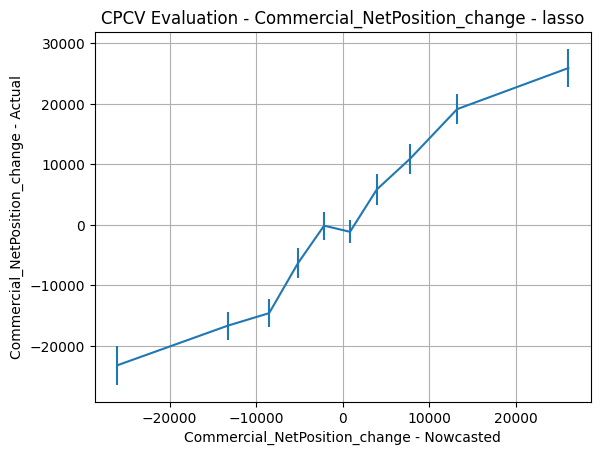

ridge: score=0.4728, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


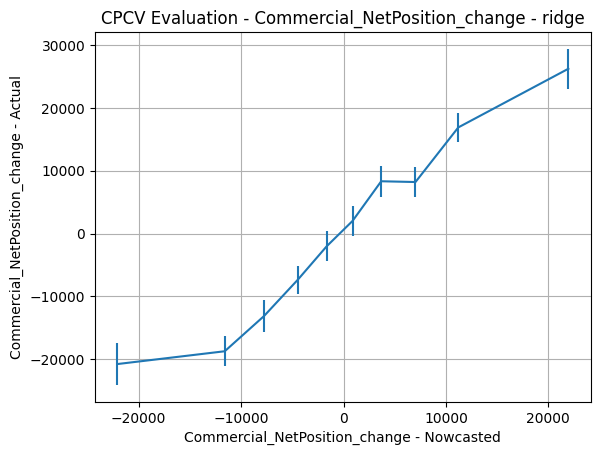

rf: score=0.5661, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


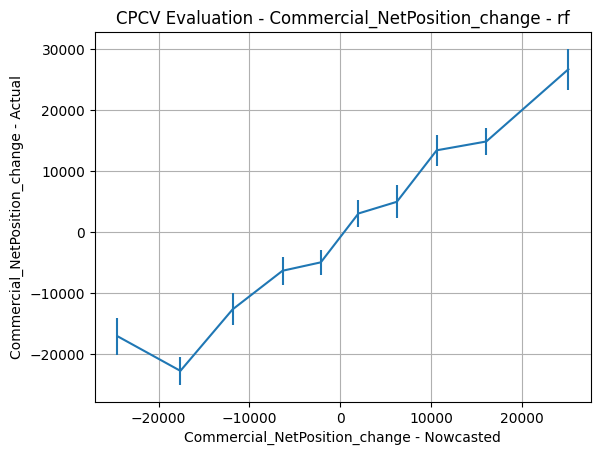

hgbm: score=0.5486, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


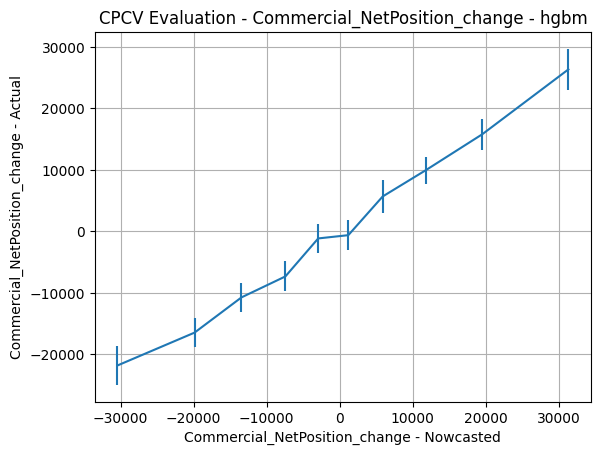

ols: score=0.4732, params={'model': 'ols'}
{}


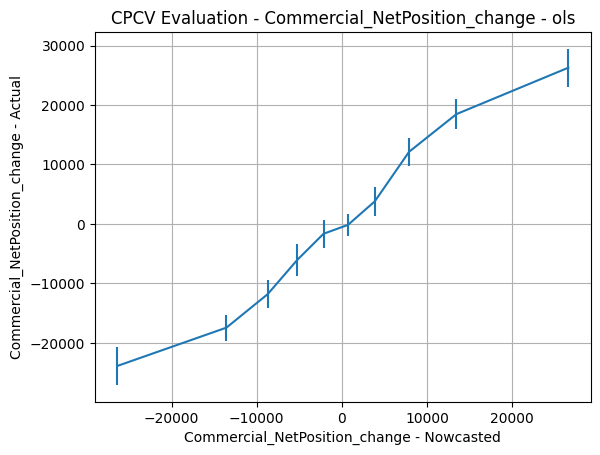

enet: score=0.3703, params={'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}
{'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}


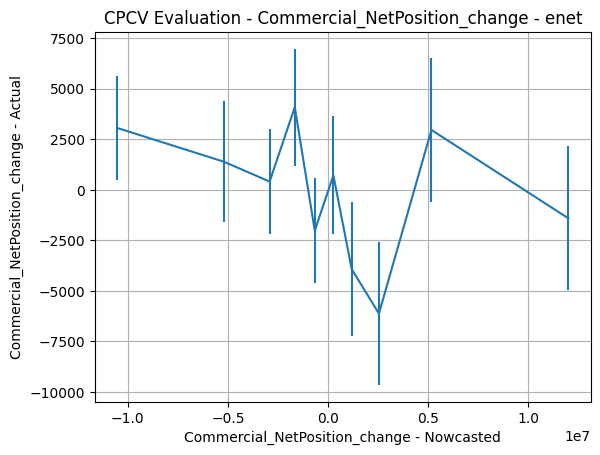

extra: score=0.5216, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}


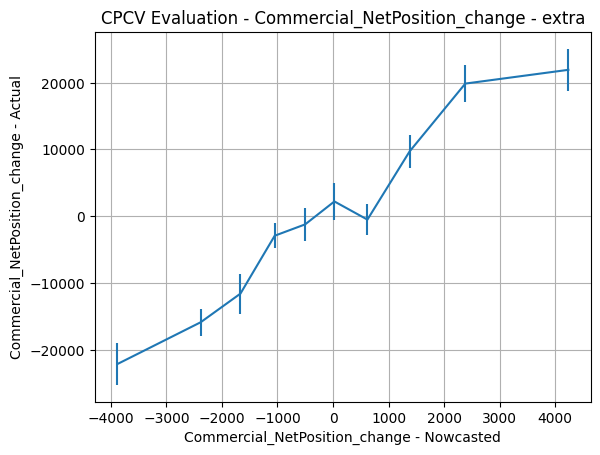

CommercialLongPosition_change
lasso: score=0.8348, params={'model': 'lasso', 'alpha': 4.693855750735629e-06}
{'alpha': 4.693855750735629e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+09, tolerance: 1.101e+08
  model = cd_fast.enet_coordinate_descent(


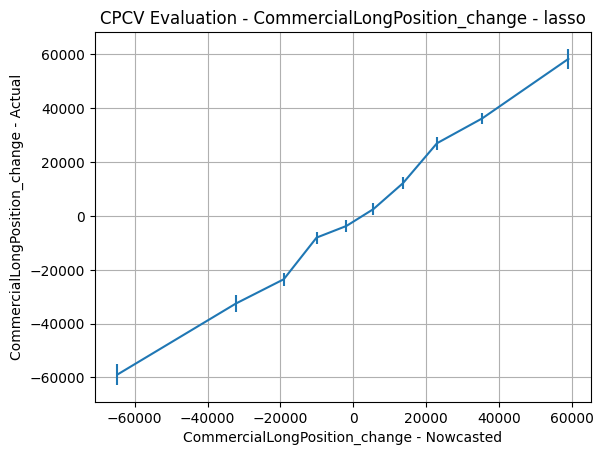

ridge: score=0.8132, params={'model': 'ridge', 'alpha': 926.5660759455584}
{'alpha': 926.5660759455584}


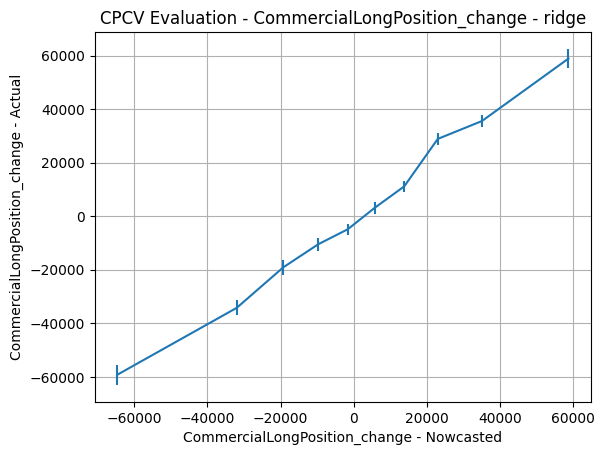

rf: score=0.7852, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


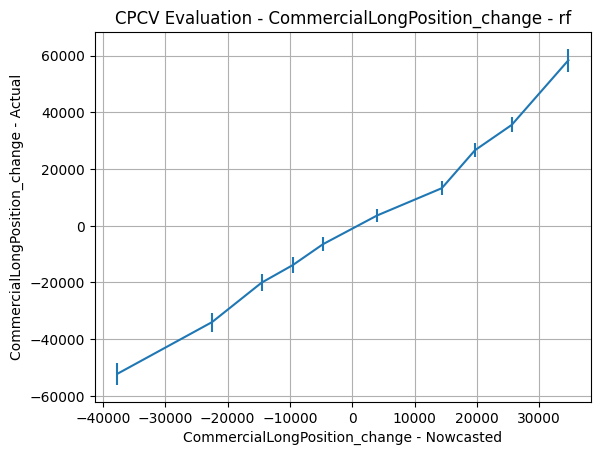

hgbm: score=0.7932, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}
{'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}


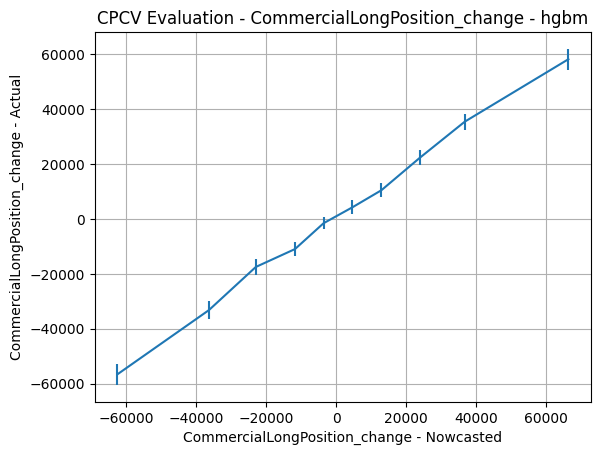

ols: score=0.8348, params={'model': 'ols'}
{}


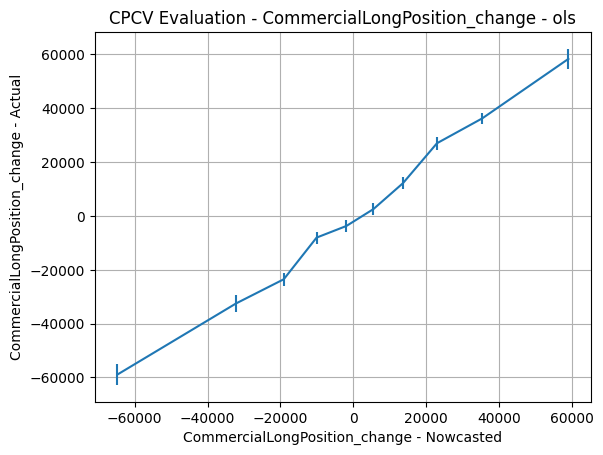

enet: score=0.8081, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


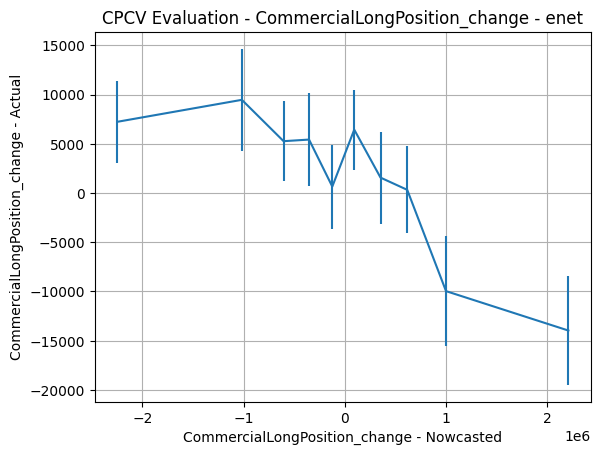

extra: score=0.8085, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


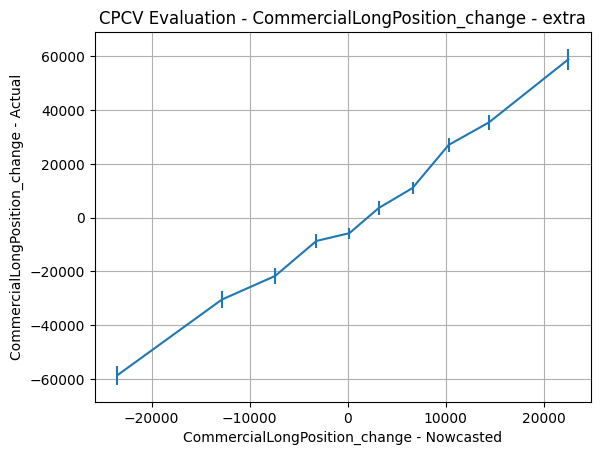

CommercialShortPosition_change
lasso: score=0.8670, params={'model': 'lasso', 'alpha': 4.693855750735629e-06}
{'alpha': 4.693855750735629e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e+08, tolerance: 1.161e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.113e+08, tolerance: 1.028e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

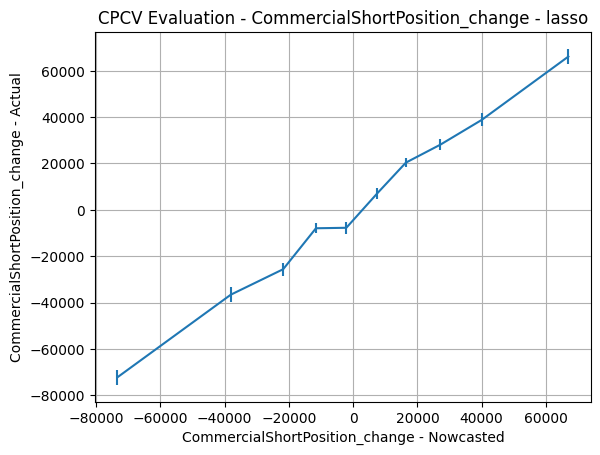

ridge: score=0.8485, params={'model': 'ridge', 'alpha': 926.5660759455584}
{'alpha': 926.5660759455584}


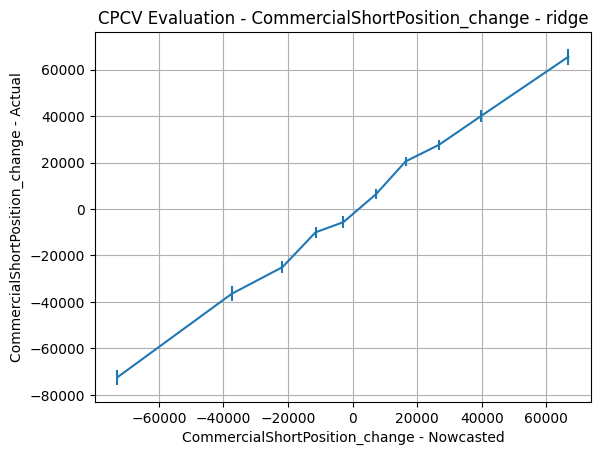

rf: score=0.8360, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


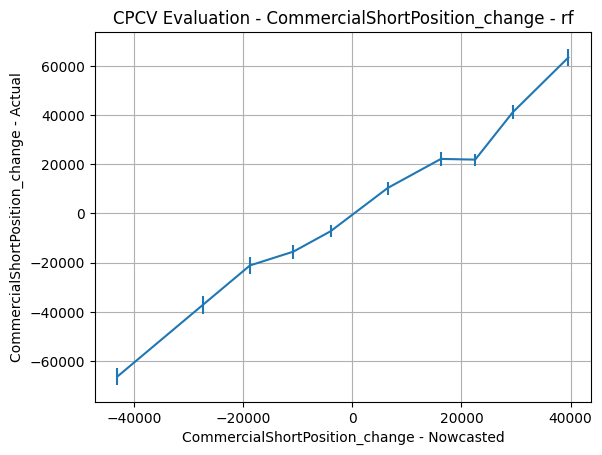

hgbm: score=0.8224, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}
{'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}


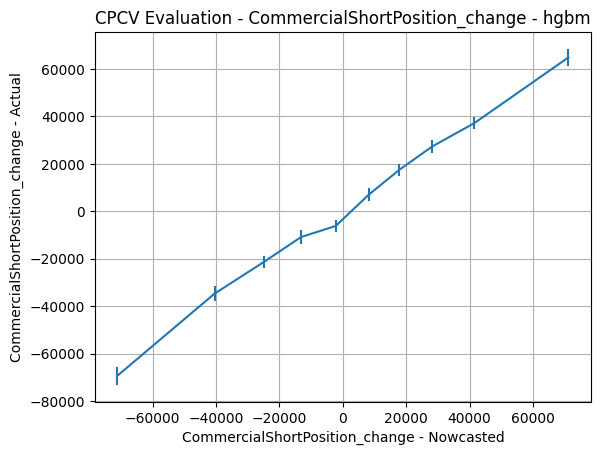

ols: score=0.8670, params={'model': 'ols'}
{}


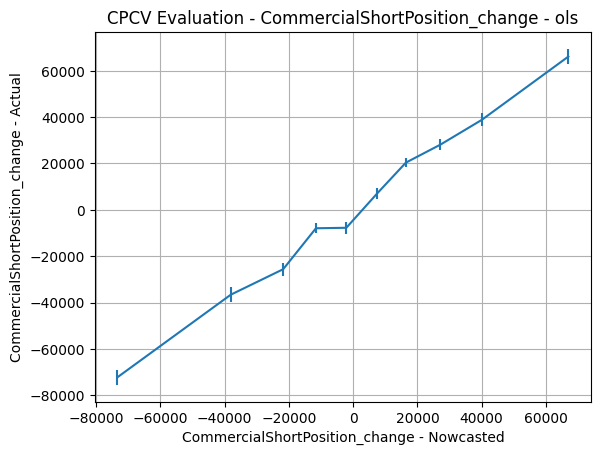

enet: score=0.8475, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


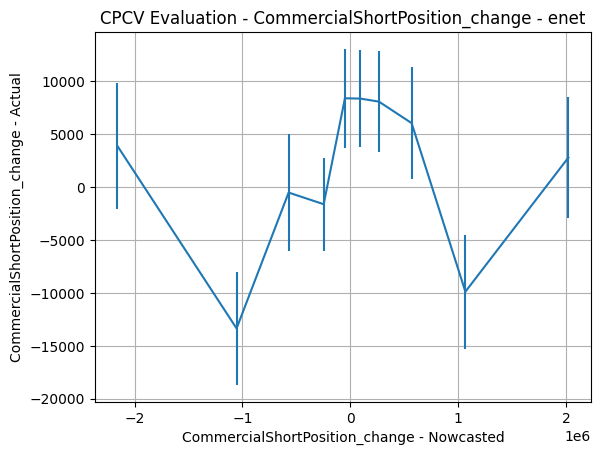

extra: score=0.8410, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


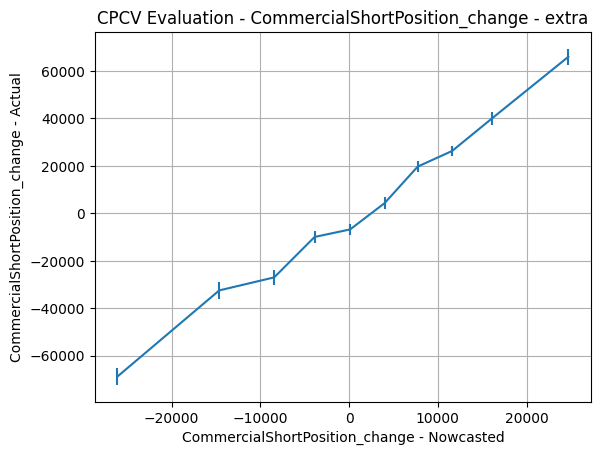

Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0699, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


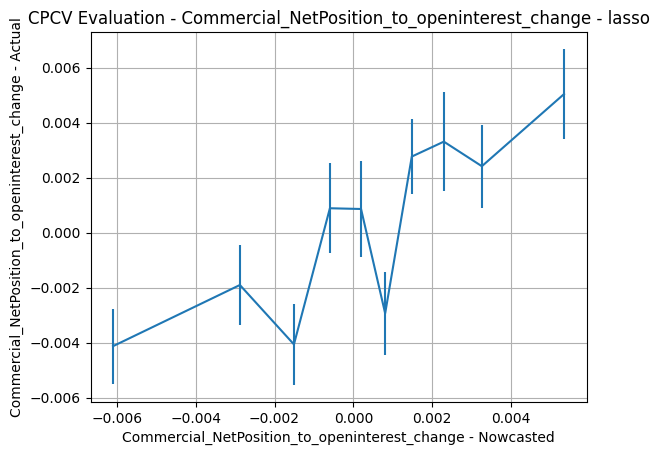

ridge: score=0.4760, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


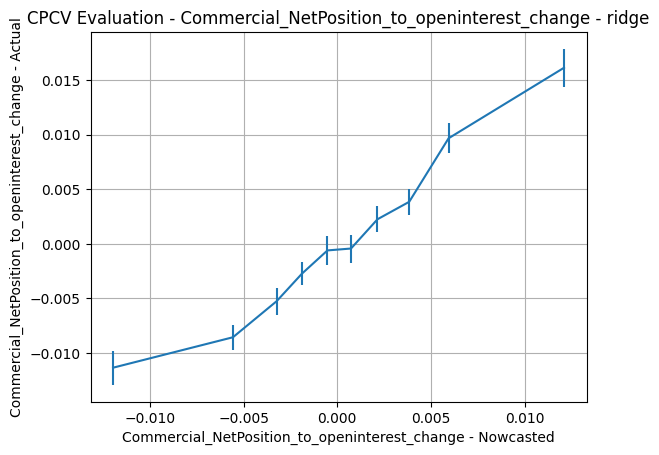

rf: score=0.5250, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


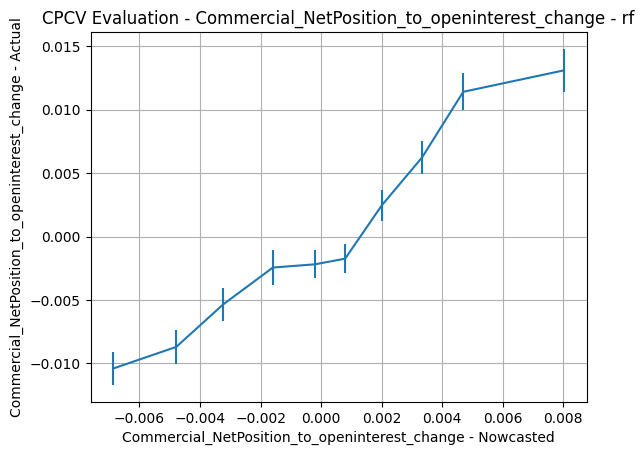

hgbm: score=0.4884, params={'model': 'hgbm', 'learning_rate': 0.26769105060048765, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.035212905569766195, 'max_leaf_nodes': 185}
{'learning_rate': 0.26769105060048765, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.035212905569766195, 'max_leaf_nodes': 185}


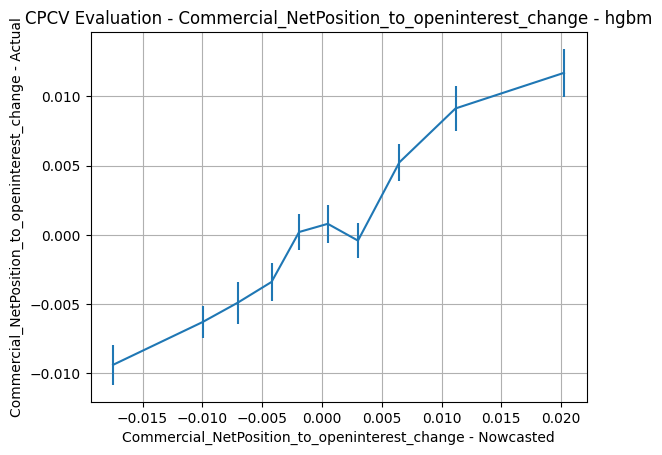

ols: score=0.4906, params={'model': 'ols'}
{}


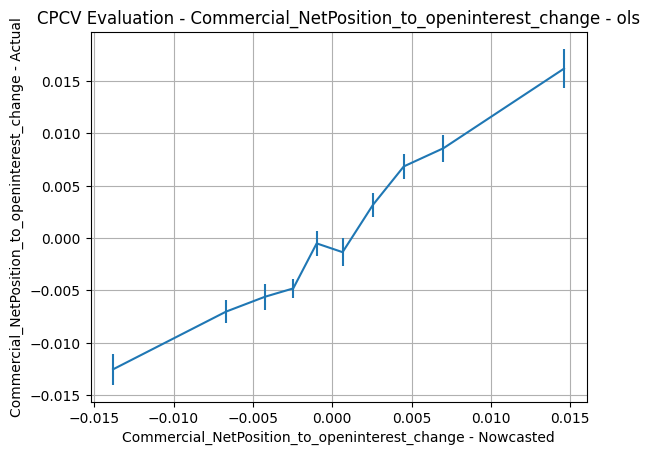

enet: score=0.2767, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


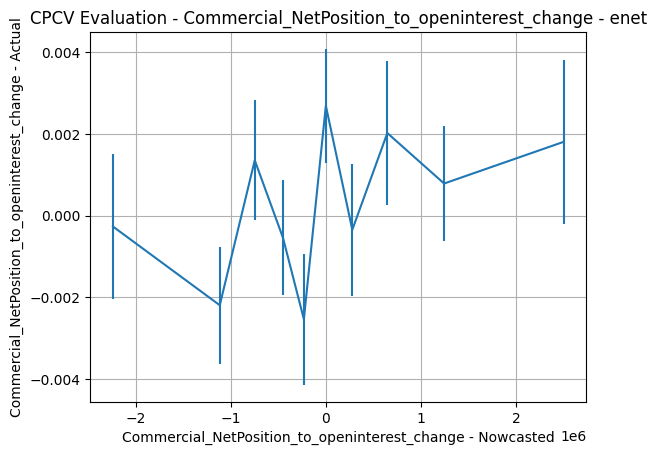

extra: score=0.5136, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


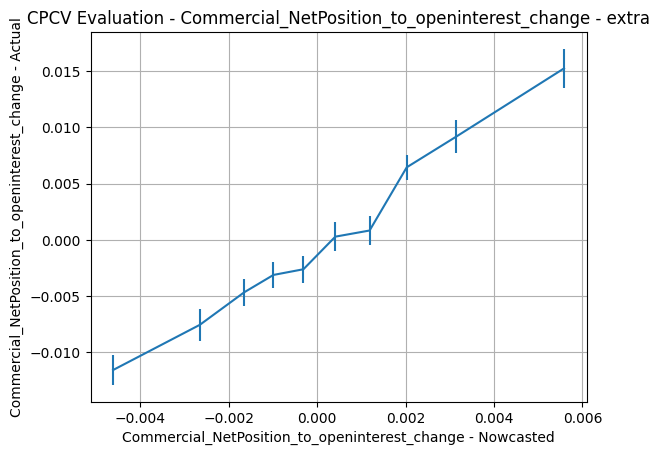

CommercialLongPosition_to_openinterest_change
lasso: score=-0.0616, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


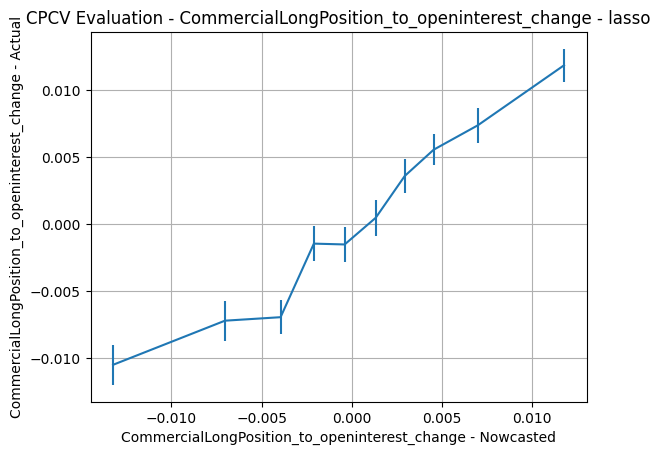

ridge: score=0.5476, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


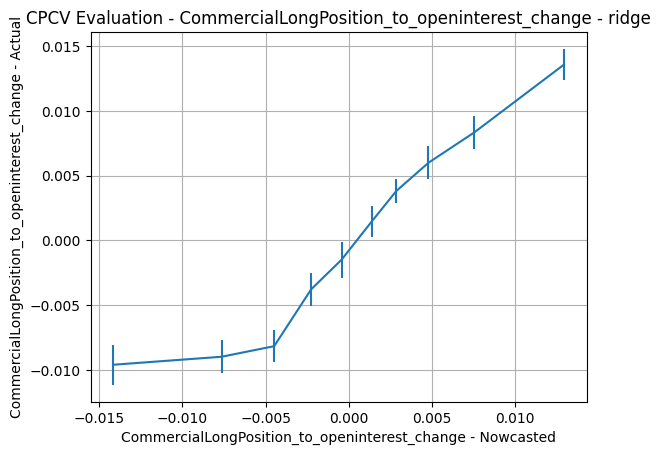

rf: score=0.5571, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


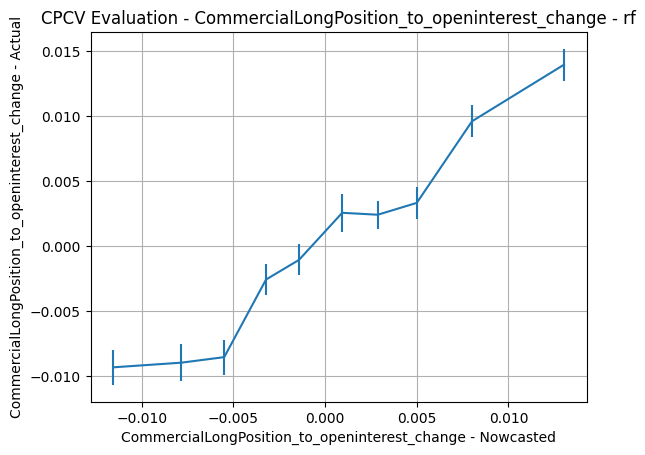

hgbm: score=0.4751, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}
{'learning_rate': 0.20342813052984288, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}


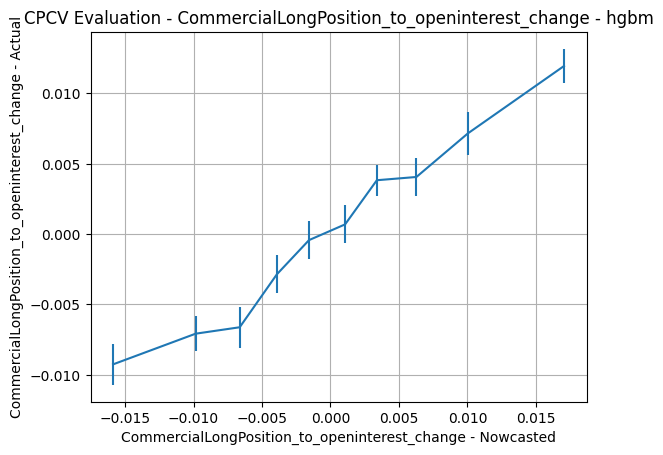

ols: score=0.5488, params={'model': 'ols'}
{}


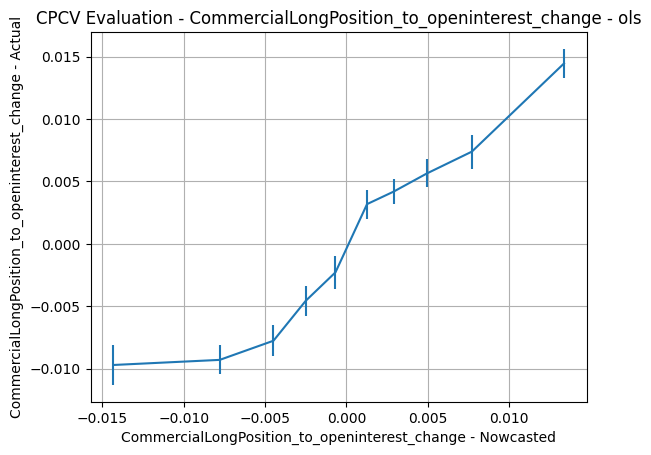

enet: score=0.4623, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


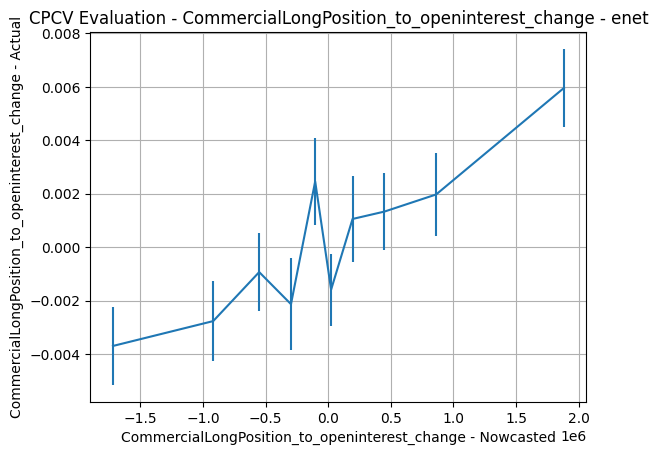

extra: score=0.5543, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}


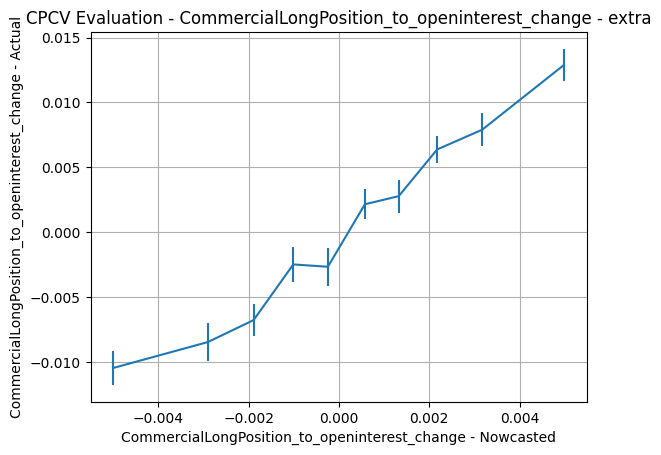

CommercialShortPosition_to_openinterest_change
lasso: score=-0.0450, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


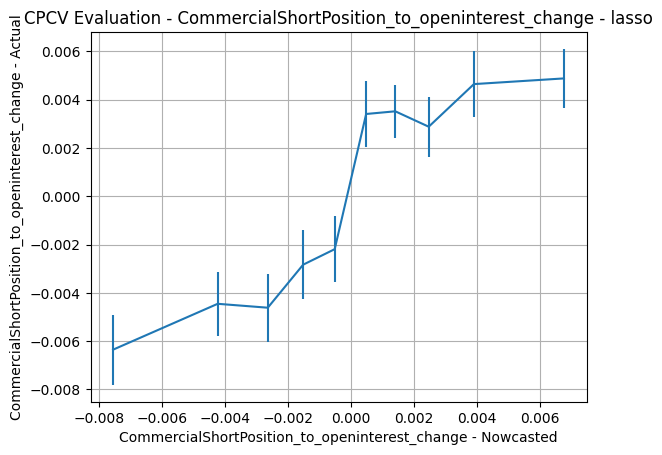

ridge: score=0.4310, params={'model': 'ridge', 'alpha': 965.05546735745}
{'alpha': 965.05546735745}


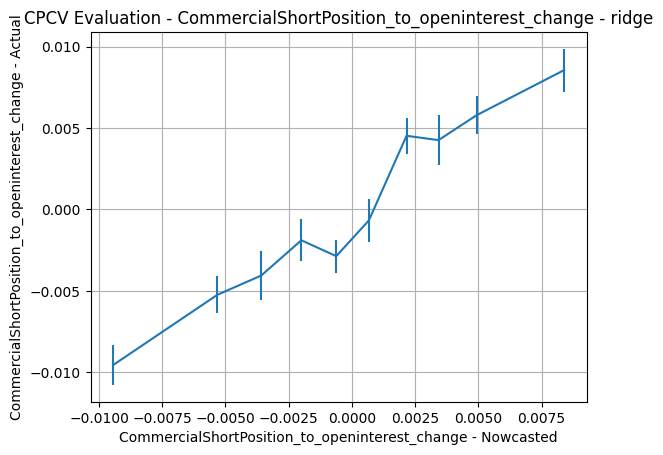

rf: score=0.4334, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


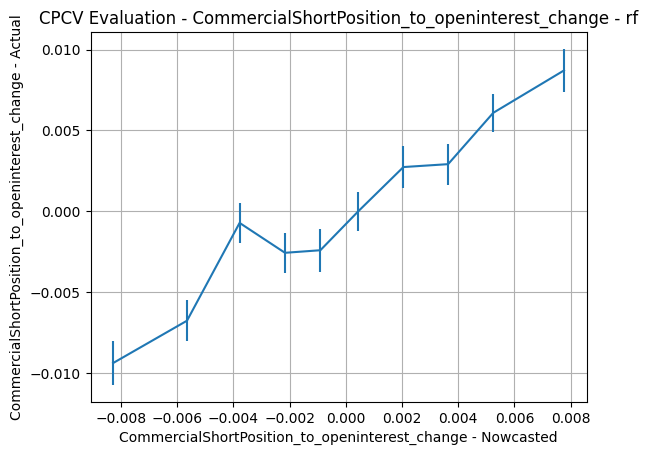

hgbm: score=0.3055, params={'model': 'hgbm', 'learning_rate': 0.23999883276717268, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.4204061364173177, 'max_leaf_nodes': 75}
{'learning_rate': 0.23999883276717268, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.4204061364173177, 'max_leaf_nodes': 75}


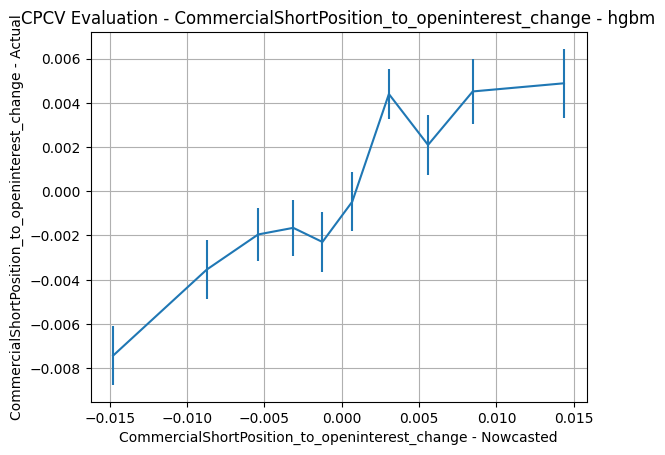

ols: score=0.4371, params={'model': 'ols'}
{}


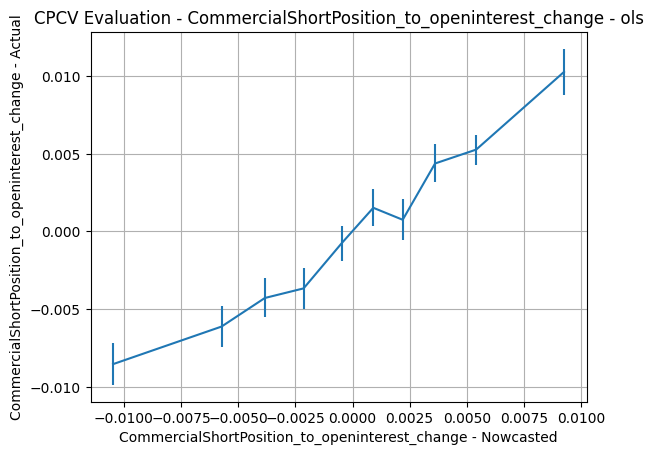

enet: score=-0.0433, params={'model': 'enet', 'alpha': 0.041564026726159685, 'l1_ratio': 0.9952690453941783, 'loss': 'huber', 'epsilon': 0.19151024636192748}
{'alpha': 0.041564026726159685, 'l1_ratio': 0.9952690453941783, 'loss': 'huber', 'epsilon': 0.19151024636192748}


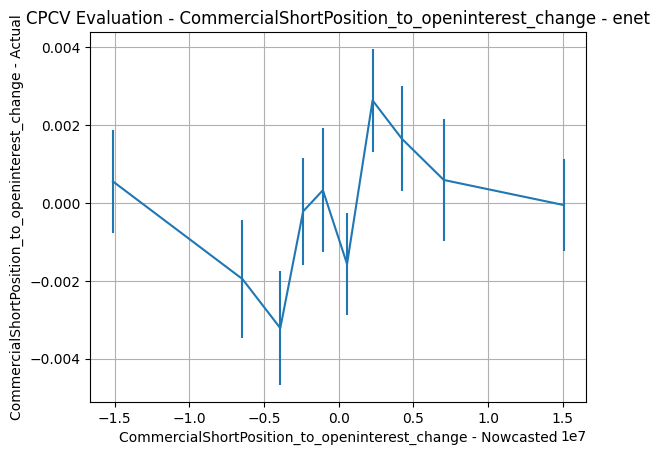

extra: score=0.4103, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


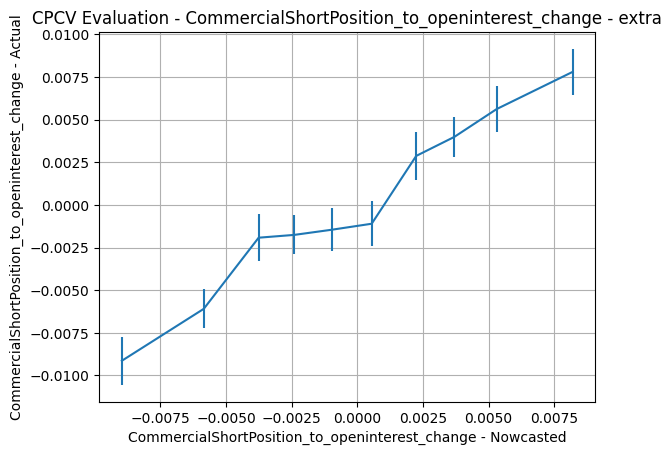

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
Commercial_NetPosition_change,0.489456,0.477623,0.539092,0.521059,0.491182,-0.040633,0.493151
CommercialLongPosition_change,0.836720,0.836989,0.789344,0.793294,0.836720,-0.163589,0.811413
CommercialShortPosition_change,0.869895,0.870007,0.818683,0.832481,0.869895,-0.022870,0.839819
Commercial_NetPosition_to_openinterest_change,0.196166,0.493572,0.546839,0.453139,0.515905,0.061938,0.547008
CommercialLongPosition_to_openinterest_change,0.514751,0.546311,0.559041,0.487347,0.548550,0.170849,0.552092
CommercialShortPosition_to_openinterest_change,0.310802,0.427621,0.433485,0.305537,0.437117,0.018132,0.411705


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

Commercial_NetPosition_change
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
CommercialLongPosition_change
{'alpha': 926.5660759455584}
CommercialShortPosition_change
{'alpha': 926.5660759455584}
Commercial_NetPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
CommercialLongPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
CommercialShortPosition_to_openinterest_change
{}


In [40]:
final_selected_model_and_parameters_per_response

{'Commercial_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 19,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'CommercialLongPosition_change': {'model_name': 'ridge',
  'params': {'alpha': 926.5660759455584}},
 'CommercialShortPosition_change': {'model_name': 'ridge',
  'params': {'alpha': 926.5660759455584}},
 'Commercial_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 600,
   'max_depth': 30,
   'min_samples_leaf': 5,
   'max_features': 'sqrt'}},
 'CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 30,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'CommercialShortPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}}}

In [41]:
import json
with open("br_cot_comm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)